### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Загрузка данных

In [2]:
data = pd.read_excel('C:/Users/Popgen/Desktop/Соматика_Ладожский.xlsx', sheet_name='final')
print(data.shape)

(16847, 1088)


In [3]:
data.head()

время Дата контроля   Сут. Удой   Fat Prot.Tru. Prot.Cru. Lactose   SNF  \
0  утро     2022-02-02       30.5  3,03      2,74      2,91    4,92  8,50   
1  утро     2022-11-03       28.0  3,31      3,21      3,37    5,10  9,35   
2  утро     2023-02-02       12.0  4,99      3,34      3,45    4,69  8,99   
3  утро     2022-10-05       27.0  3,89      3,28      3,42    5,14  9,40   
4  обед     2022-02-01       30.5  3,37      2,79      2,95    4,88  8,50   

      TS Cas.B  ...      1290      1291      1292      1293      1294  \
0  11,42  2,29  ...  0,983700  0,986762  0,989466  0,991132  0,990958   
1  12,51  2,69  ...  0.989132  0.991657   0.99473   0.99672  0.996314   
2  13,70  2,80  ...  0,995478  0,993526  0,992713  0,992127  0,991015   
3  13,03  2,72  ...  1.009265  1.006086  1.004061  1.003805  1.005305   
4  11,76  2,34  ...  0.992559  0.994356  0.996173  0.996784    0.9951   

       1295      1296      1297      1298      1299  
0  0,988523  0,984176  0,979045  0,974695  0,976559  
1  0.993296  0.988618  0.983771  0.980076   0.98044  
2  0,989278  0,987441  0,986165  0,985742  0,986013  
3  1.007874   1.01048  1.012285  1.013004  1.011249  
4  0.990592  0.983541  0.975078  0.967012  0.962424  

[5 rows x 1088 columns]

In [4]:
data.dtypes

время                     object
Дата контроля     datetime64[ns]
Сут. Удой                float64
Fat                       object
Prot.Tru.                 object
                       ...      
1295                      object
1296                      object
1297                      object
1298                      object
1299                      object
Length: 1088, dtype: object

In [5]:
data = data.replace(',', '.', regex=True)

#### Анализ данных в целом

In [6]:
data.columns

Index([         'время', 'Дата контроля ',      'Сут. Удой',            'Fat',
            'Prot.Tru.',      'Prot.Cru.',        'Lactose',            'SNF',
                   'TS',          'Cas.B',
       ...
                   1290,             1291,             1292,             1293,
                   1294,             1295,             1296,             1297,
                   1298,             1299],
      dtype='object', length=1088)

In [36]:
data['year'] = data['Дата контроля '].dt.year

C:\Users\Popgen\AppData\Local\Temp\ipykernel_4160\3849766414.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['year'] = data['Дата контроля '].dt.year


In [38]:
colors = sns.color_palette('pastel') [0:4]

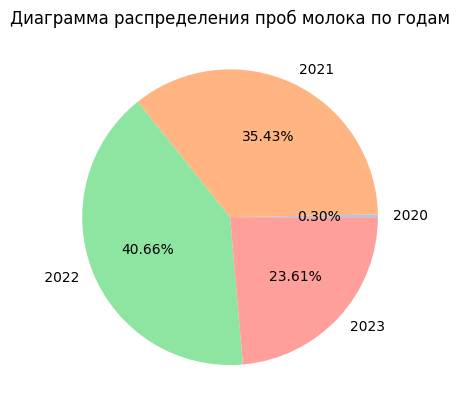

In [39]:
plt.pie(data.groupby('year').size(), autopct='%.2f%%', colors=colors, labels = ['2020', '2021', ' 2022', '2023'])
plt.title("Диаграмма распределения проб молока по годам")
plt.show()

### Разделение данных на спектр и признаки

In [7]:
spectra = data.iloc[:, 28:1088]

In [8]:
spectra.head()

240       241       242       243       244       245       246   \
0  1.146779  1.139355  1.133797  1.126494  1.119543  1.113161  1.107441   
1  1.168412  1.159807  1.153338   1.14488  1.136837  1.129399  1.122605   
2  1.228687  1.217978  1.210191  1.200287  1.191059  1.182551  1.174676   
3  1.185947  1.176517  1.169379  1.159993   1.15105  1.142822  1.135418   
4  1.156541  1.148206  1.142112  1.134344  1.127198  1.120795  1.115111   

       247       248       249   ...      1290      1291      1292      1293  \
0  1.102150  1.096517  1.089158  ...  0.983700  0.986762  0.989466  0.991132   
1  1.116178  1.109323  1.100661  ...  0.989132  0.991657   0.99473   0.99672   
2  1.167081  1.158964  1.148986  ...  0.995478  0.993526  0.992713  0.992127   
3  1.128584  1.121495  1.112694  ...  1.009265  1.006086  1.004061  1.003805   
4  1.109826  1.104126  1.096634  ...  0.992559  0.994356  0.996173  0.996784   

       1294      1295      1296      1297      1298      1299  
0  0.990958  0.988523  0.984176  0.979045  0.974695  0.976559  
1  0.996314  0.993296  0.988618  0.983771  0.980076   0.98044  
2  0.991015  0.989278  0.987441  0.986165  0.985742  0.986013  
3  1.005305  1.007874   1.01048  1.012285  1.013004  1.011249  
4    0.9951  0.990592  0.983541  0.975078  0.967012  0.962424  

[5 rows x 1060 columns]

In [9]:
spectra.dtypes

240     object
241     object
242     object
243     object
244     object
         ...  
1295    object
1296    object
1297    object
1298    object
1299    object
Length: 1060, dtype: object

In [10]:
spectra = spectra.iloc[:,:].astype(float)

In [11]:
features = data.iloc[:,2:28]

In [12]:
features.columns

Index(['Сут. Удой', 'Fat', 'Prot.Tru.', 'Prot.Cru.', 'Lactose', 'SNF', 'TS',
       'Cas.B', 'Acetone', 'BHB', 'Urea', 'FPD', 'pH', 'C14:0', 'C16:0',
       'C18:0', 'C18:1', 'LCFA', 'MCFA', 'MUFA', 'PUFA', 'SFA', 'SCFA', 'TFA',
       'Cells', 'DSCC'],
      dtype='object')

In [13]:
cols_to_convert = ['Сут. Удой', 'Fat', 'Prot.Tru.', 'Prot.Cru.', 'Lactose', 'SNF', 'TS',
       'Cas.B', 'Acetone', 'BHB', 'Urea', 'pH', 'C14:0', 'C16:0',
       'C18:0', 'C18:1', 'LCFA', 'MCFA', 'MUFA', 'PUFA', 'SFA', 'SCFA', 'TFA', 'DSCC']

In [14]:
features[cols_to_convert] = features[cols_to_convert].astype(float)

In [15]:
features['Cells'] = features['Cells'].astype('int64')

In [16]:
features.loc[:, 'SCS'] = np.log2(features['Cells'] / 100.) + 3

In [17]:
features = features.rename(columns={'Сут. Удой': 'milking', 'Cells': 'SCC'})

In [18]:
features.dtypes

milking      float64
Fat          float64
Prot.Tru.    float64
Prot.Cru.    float64
Lactose      float64
SNF          float64
TS           float64
Cas.B        float64
Acetone      float64
BHB          float64
Urea         float64
FPD            int64
pH           float64
C14:0        float64
C16:0        float64
C18:0        float64
C18:1        float64
LCFA         float64
MCFA         float64
MUFA         float64
PUFA         float64
SFA          float64
SCFA         float64
TFA          float64
SCC            int64
DSCC         float64
SCS          float64
dtype: object

In [19]:
features = features[['milking', 'Fat', 'Prot.Tru.', 'Lactose', 'SNF', 'TS',
       'Cas.B', 'Acetone', 'BHB', 'Urea', 'pH', 'C14:0', 'C16:0',
       'C18:0', 'C18:1', 'LCFA', 'MCFA', 'MUFA', 'PUFA', 'SFA', 'SCFA', 'TFA', 'SCC', 'SCS']]

#### Выбросы

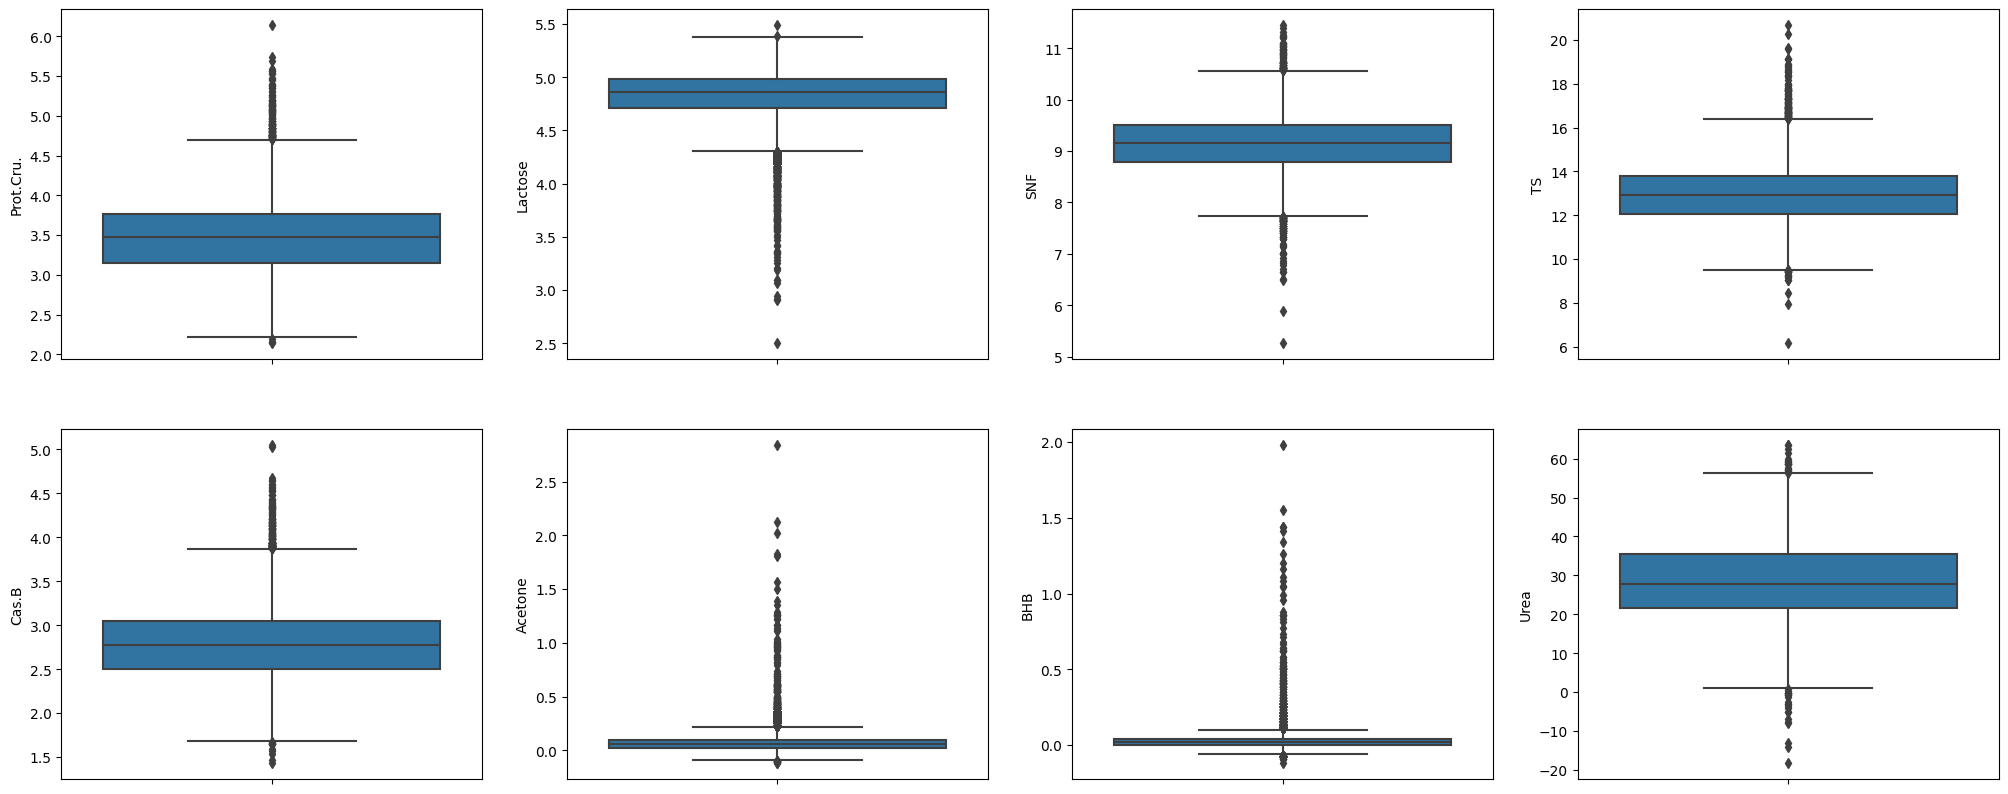

In [50]:
#'Prot.Cru.', 'Lactose', 'SNF', 'TS', 'Cas.B', 'Acetone',
#'BHB', 'Urea'
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
sns.boxplot(y=features["Prot.Cru."], ax=axes[0][0]);
sns.boxplot(y=features["Lactose"], ax=axes[0][1]);
sns.boxplot(y=features["SNF"], ax=axes[0][2]);
sns.boxplot(y=features["TS"], ax=axes[0][3]);
sns.boxplot(y=features["Cas.B"], ax=axes[1][0]);
sns.boxplot(y=features["Acetone"], ax=axes[1][1]);
sns.boxplot(y=features["BHB"], ax=axes[1][2]);
sns.boxplot(y=features["Urea"], ax=axes[1][3]);

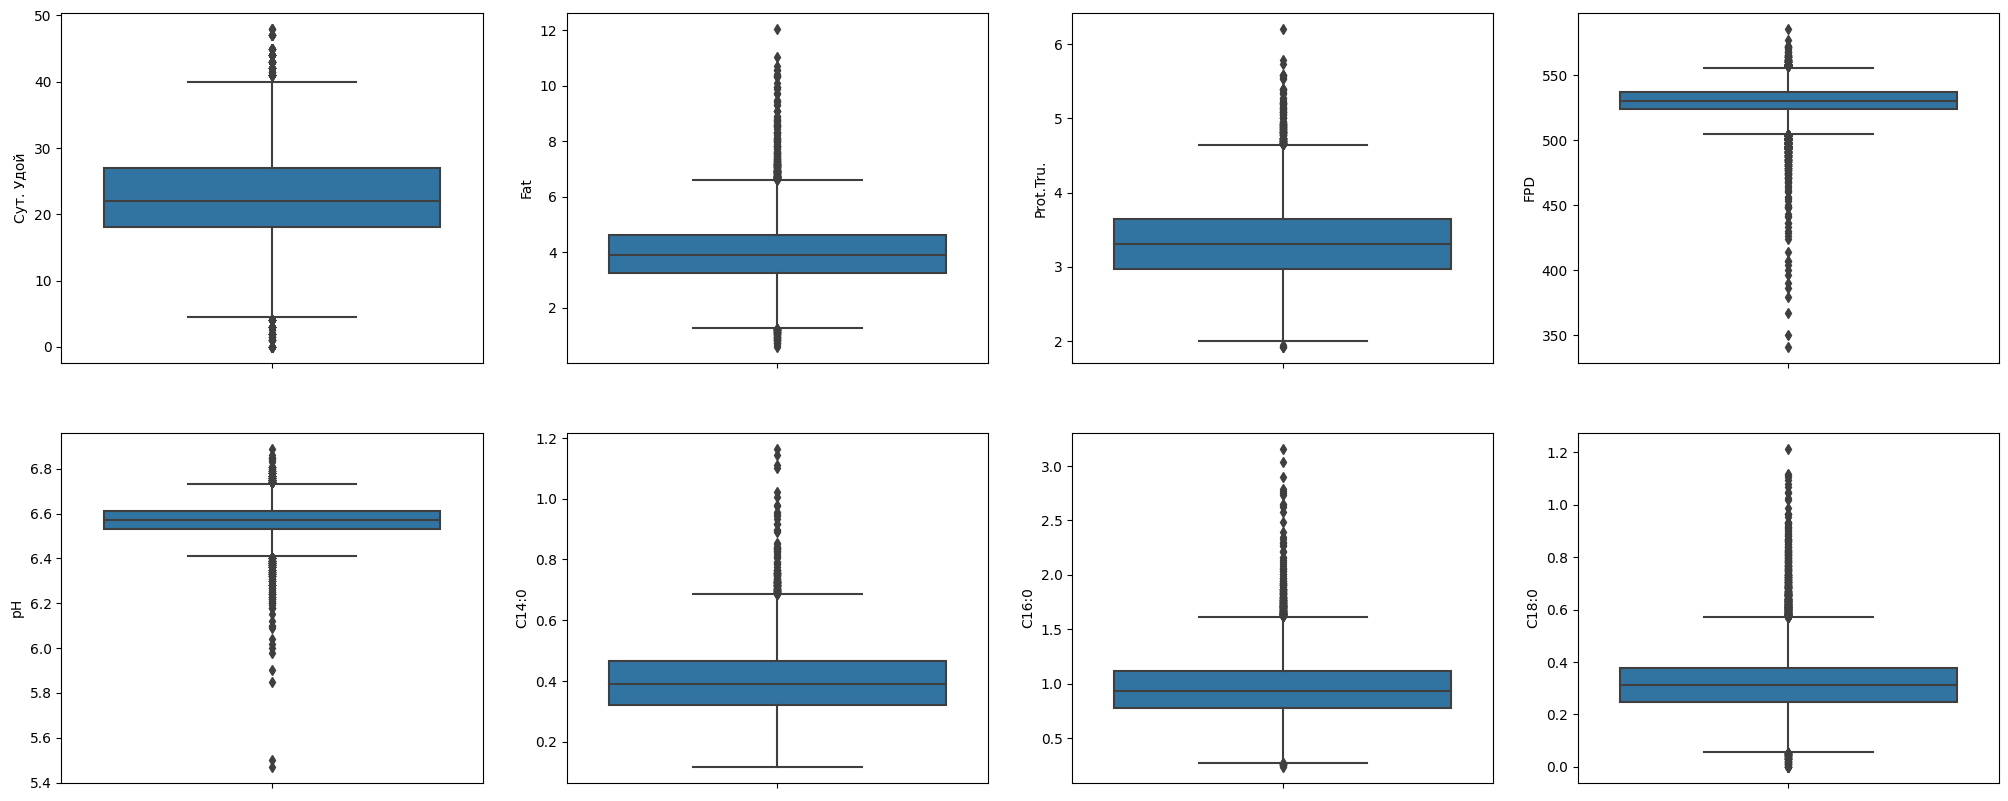

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
sns.boxplot(y=features["Сут. Удой"], ax=axes[0][0]);
sns.boxplot(y=features["Fat"], ax=axes[0][1]);
sns.boxplot(y=features["Prot.Tru."], ax=axes[0][2]);
sns.boxplot(y=features["FPD"], ax=axes[0][3]);
sns.boxplot(y=features["pH"], ax=axes[1][0]);
sns.boxplot(y=features["C14:0"], ax=axes[1][1]);
sns.boxplot(y=features["C16:0"], ax=axes[1][2]);
sns.boxplot(y=features["C18:0"], ax=axes[1][3]);

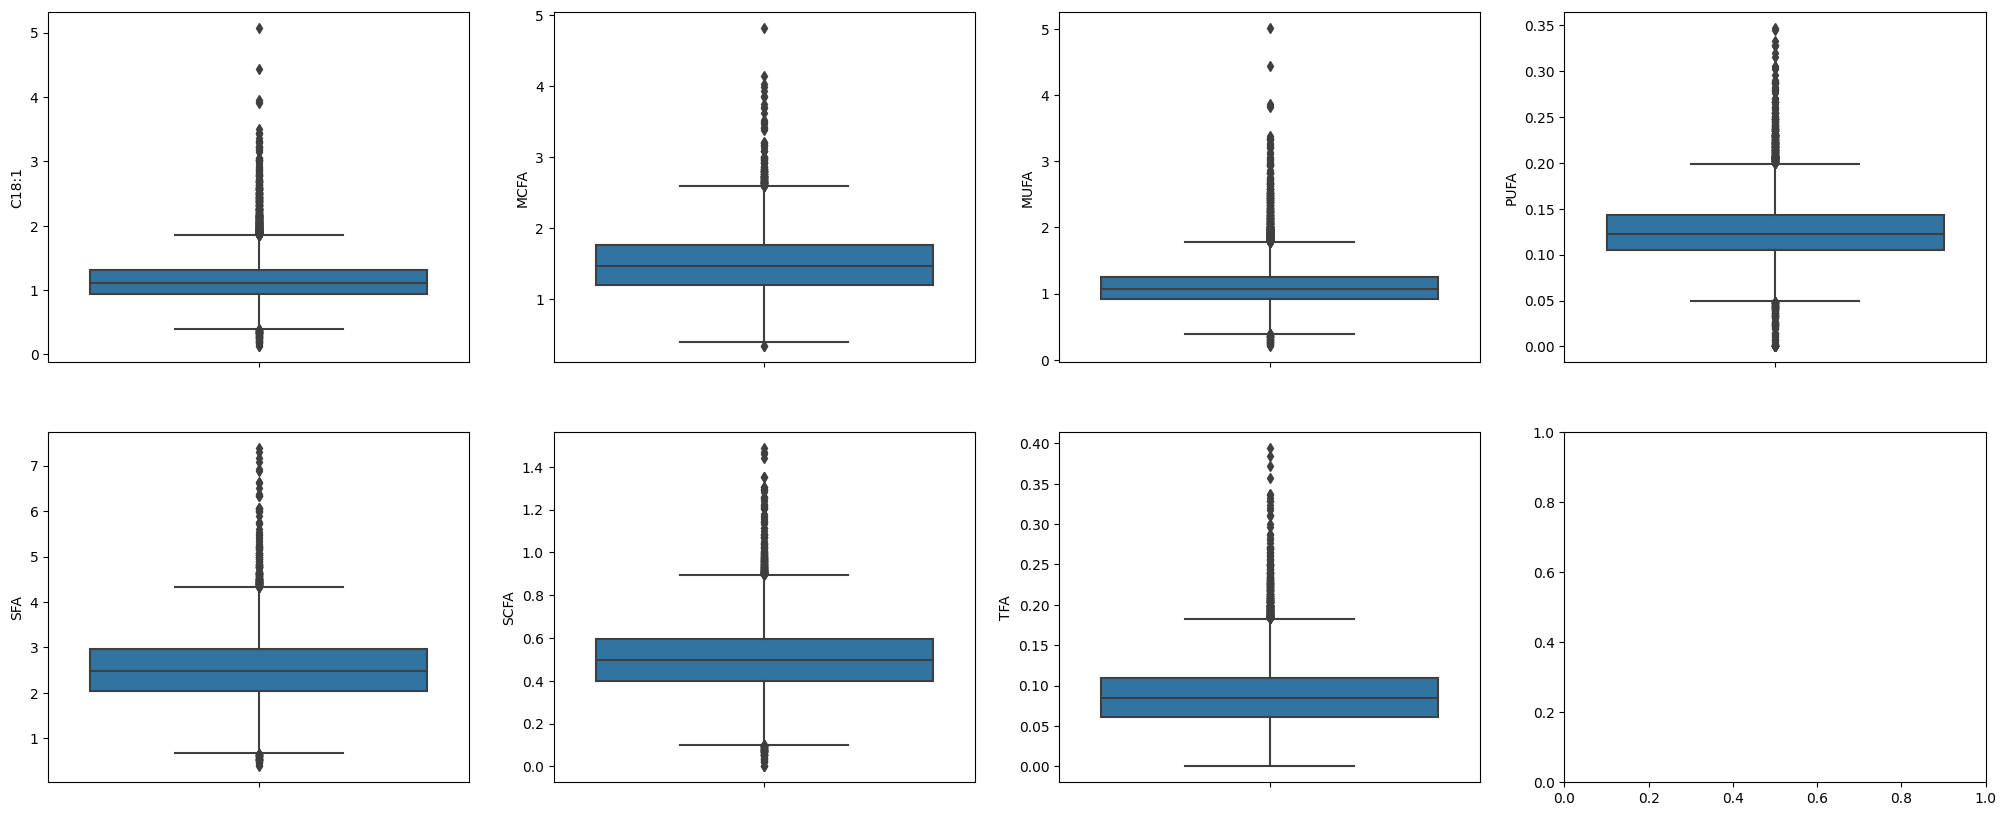

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
sns.boxplot(y=features["C18:1"], ax=axes[0][0]);
sns.boxplot(y=features["MCFA"], ax=axes[0][1]);
sns.boxplot(y=features["MUFA"], ax=axes[0][2]);
sns.boxplot(y=features["PUFA"], ax=axes[0][3]);
sns.boxplot(y=features["SFA"], ax=axes[1][0]);
sns.boxplot(y=features["SCFA"], ax=axes[1][1]);
sns.boxplot(y=features["TFA"], ax=axes[1][2]);


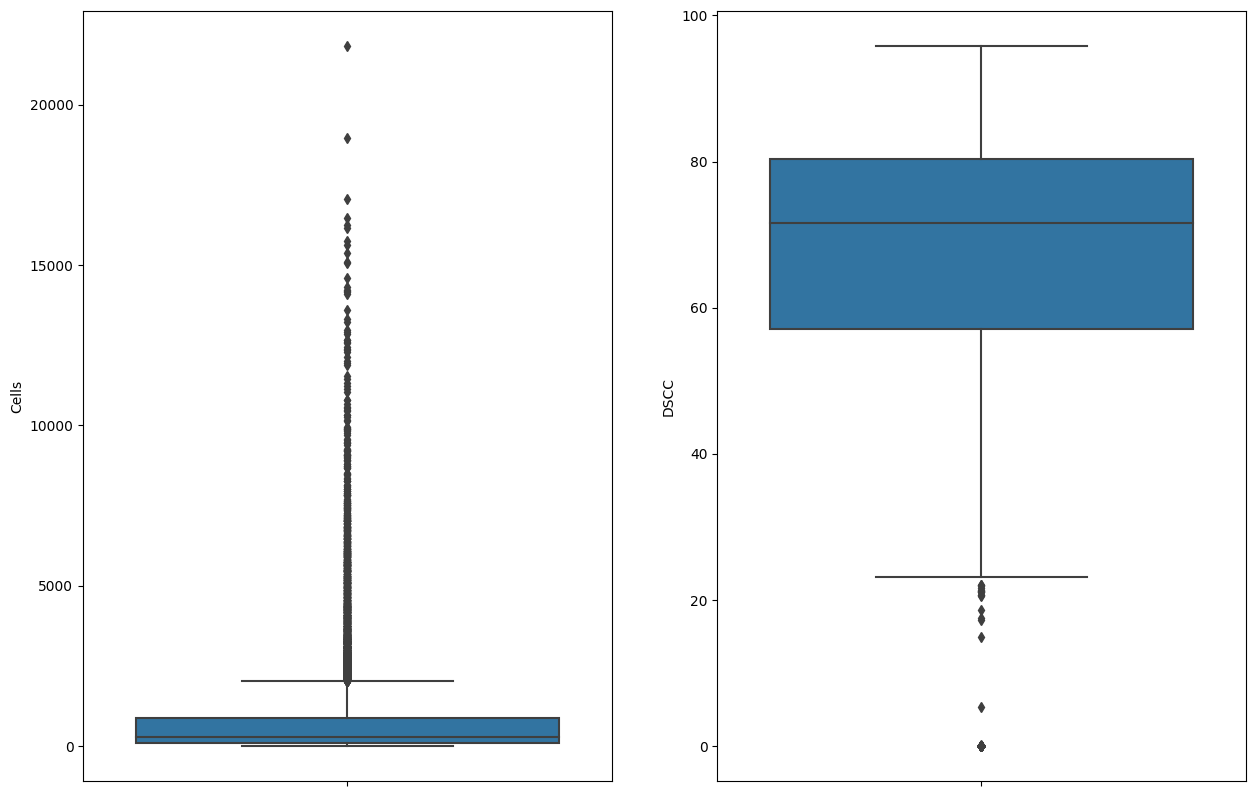

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.boxplot(y=features["Cells"], ax=axes[0]);
sns.boxplot(y=features["DSCC"], ax=axes[1]);

### Анализ данных Features

In [87]:
features.describe()

milking           Fat     Prot.Tru.       Lactose           SNF  \
count  13049.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean      22.286865      3.953335      3.326376      4.825149      9.146071   
std        7.069611      1.064600      0.490262      0.240202      0.539607   
min        0.000000      0.590000      1.920000      2.500000      5.260000   
25%       18.000000      3.260000      2.970000      4.710000      8.790000   
50%       22.000000      3.910000      3.310000      4.860000      9.150000   
75%       27.000000      4.600000      3.640000      4.980000      9.500000   
max       48.000000     12.050000      6.210000      5.490000     11.450000   

                 TS         Cas.B       Acetone           BHB          Urea  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean      12.978843      2.791517      0.073534      0.026761     28.629958   
std        1.302677      0.411875      0.096072      0.066978      9.480837   
min        6.160000      1.430000     -0.120000     -0.120000    -18.300000   
25%       12.080000      2.500000      0.020000      0.000000     21.700000   
50%       12.930000      2.780000      0.060000      0.020000     27.700000   
75%       13.810000      3.050000      0.100000      0.040000     35.550000   
max       20.680000      5.050000      2.840000      1.980000     63.500000   

       ...         C18:1          LCFA          MCFA          MUFA  \
count  ...  16847.000000  16847.000000  16847.000000  16847.000000   
mean   ...      1.144419      1.421092      1.492948      1.107803   
std    ...      0.326559      0.443117      0.422326      0.311660   
min    ...      0.126000      0.000000      0.332000      0.202000   
25%    ...      0.940000      1.146000      1.204000      0.912000   
50%    ...      1.111000      1.384000      1.467000      1.075000   
75%    ...      1.305000      1.641000      1.759000      1.257000   
max    ...      5.068000      6.184000      4.817000      5.013000   

               PUFA           SFA          SCFA           TFA           SCC  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       0.124979      2.516073      0.500569      0.087770    805.522764   
std        0.031819      0.718594      0.157783      0.040295   1418.954284   
min        0.000000      0.382000      0.000000      0.000000      1.000000   
25%        0.105000      2.042000      0.398000      0.061000     92.000000   
50%        0.123000      2.486000      0.495000      0.085000    281.000000   
75%        0.143000      2.955000      0.597000      0.110000    867.500000   
max        0.347000      7.384000      1.487000      0.394000  21826.000000   

                SCS  
count  16847.000000  
mean       4.535309  
std        2.131538  
min       -3.643856  
25%        2.879706  
50%        4.490570  
75%        6.116864  
max       10.769904  

[8 rows x 24 columns]

In [25]:
mask = np.zeros_like(features.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

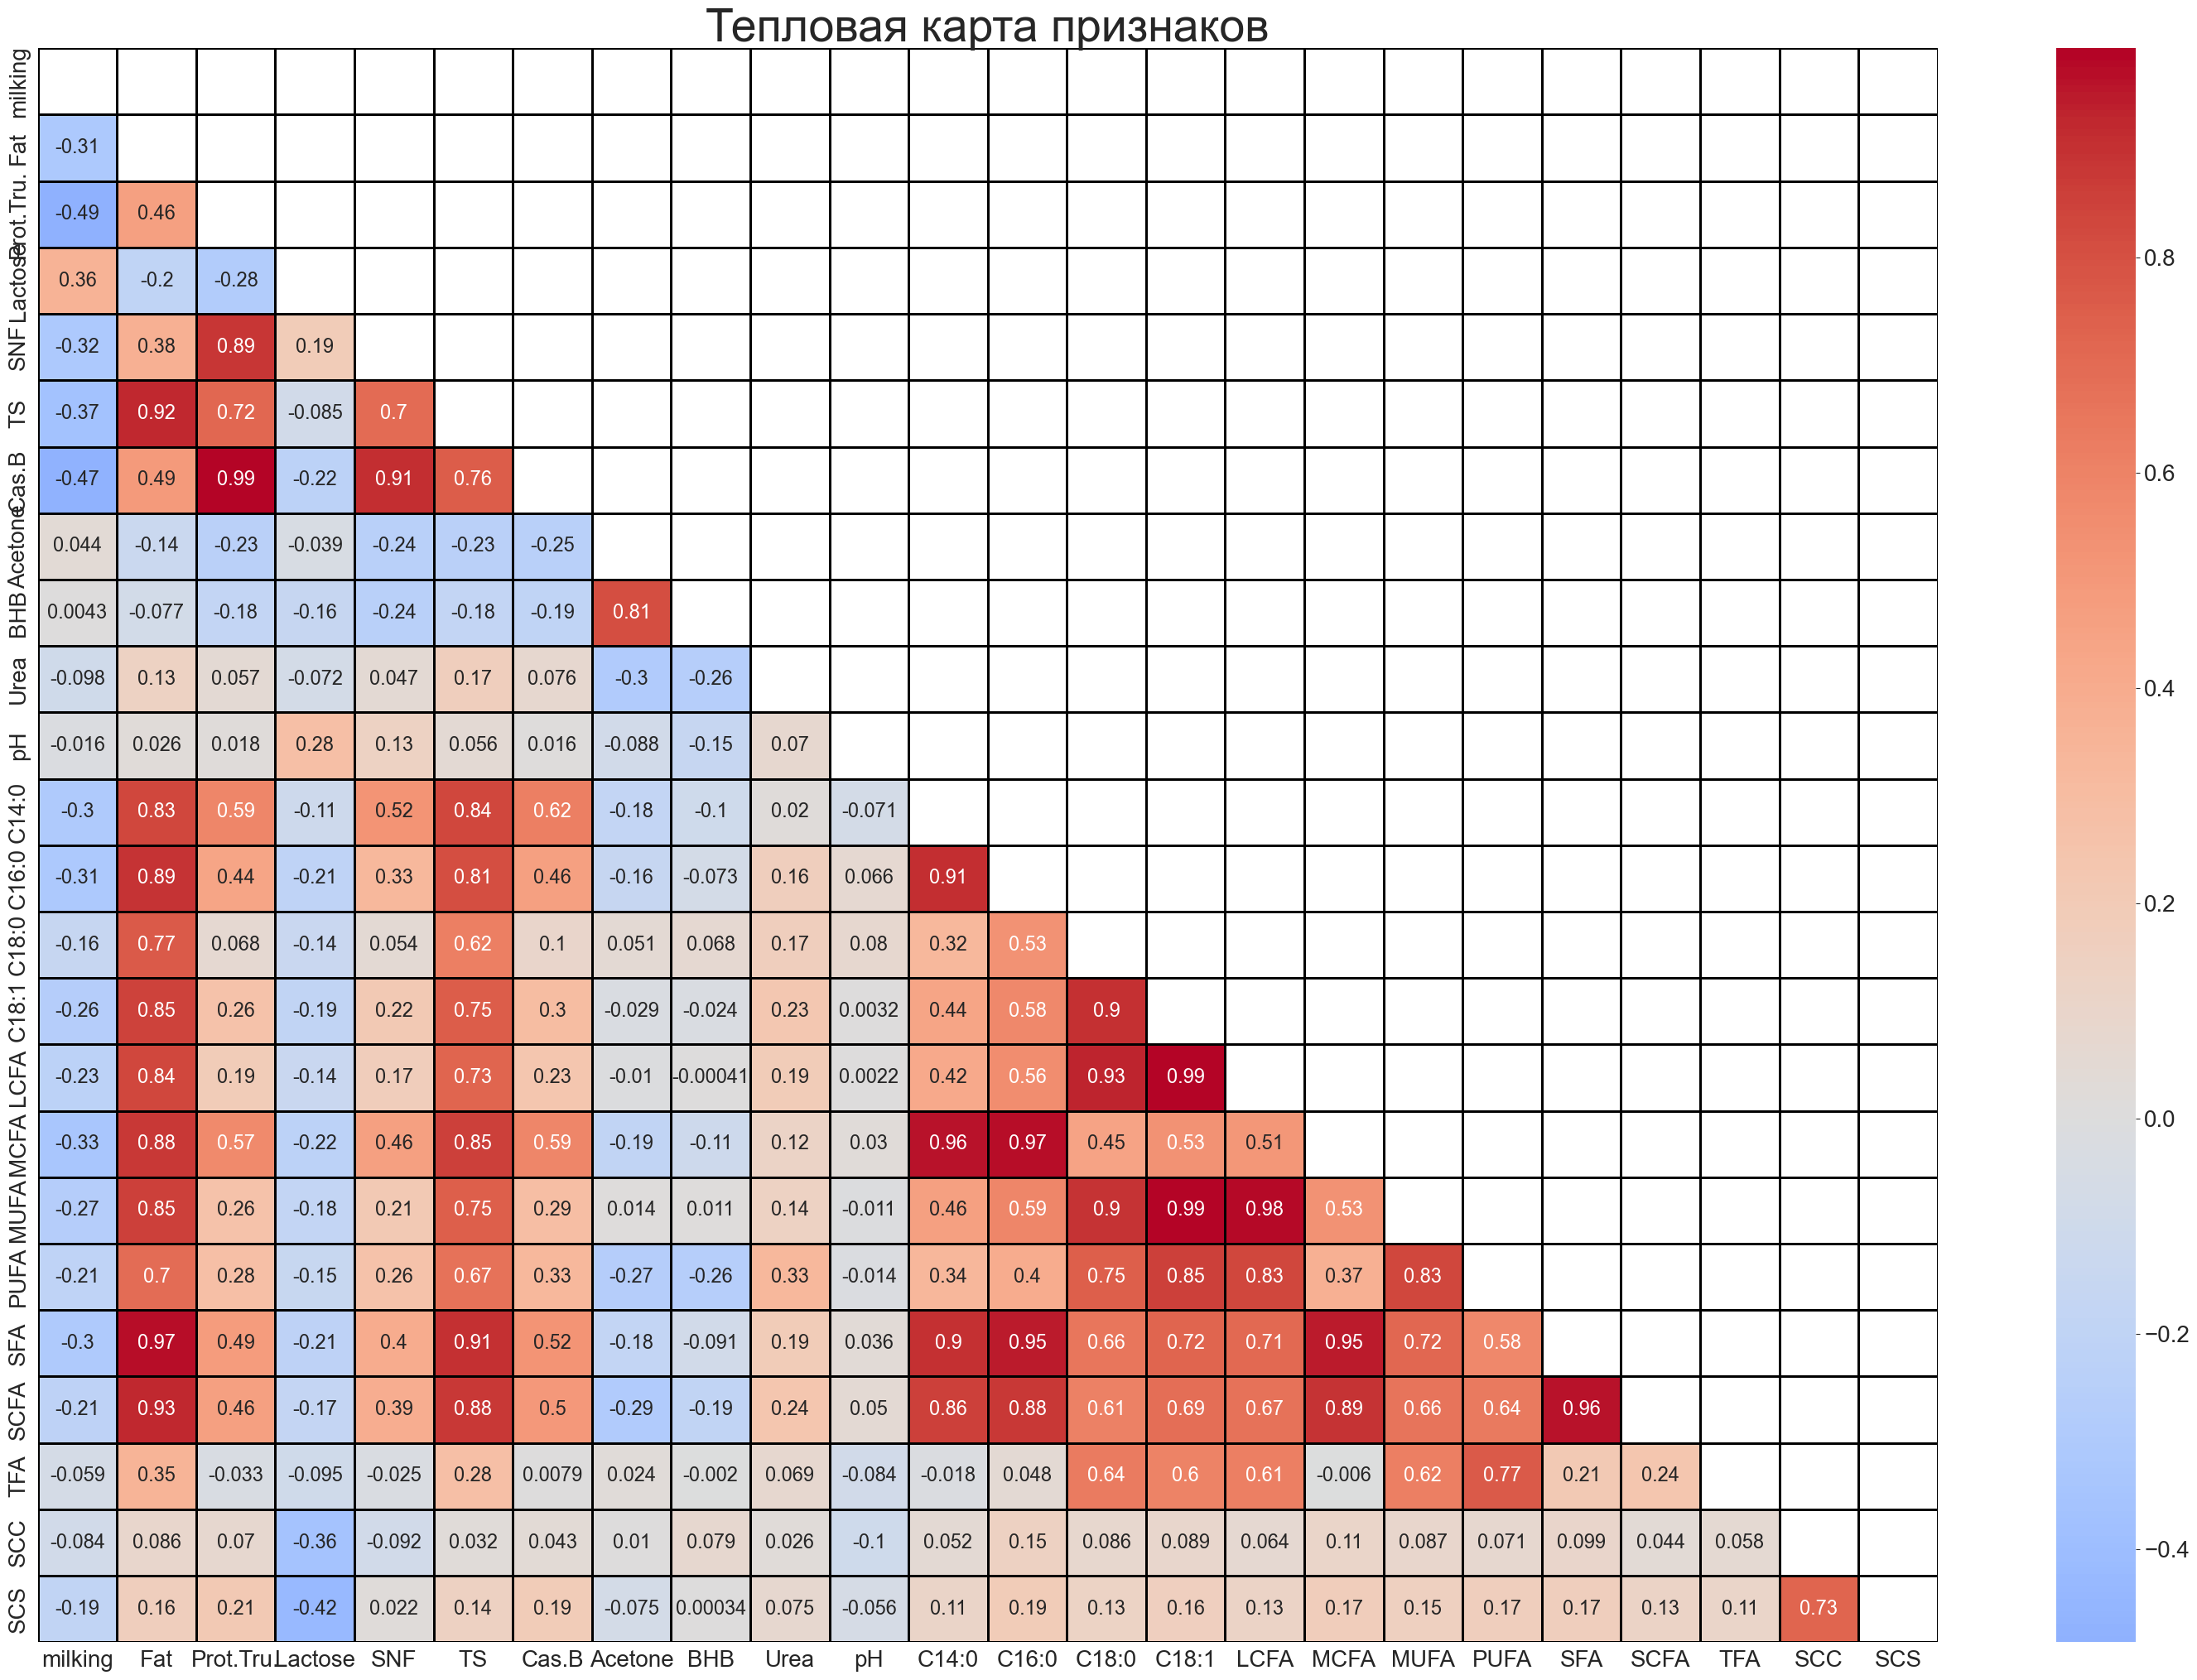

In [34]:
fig = plt.figure(figsize=(37, 25))
ax = sns.heatmap(features.corr(), mask=mask, annot=True, annot_kws={"size": 17}, fmt='.2g',  cmap= 'coolwarm', linewidths=1, linecolor='black', center= 0)
sns.set_style('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
plt.title('Тепловая карта признаков', fontsize=40)
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

plt.show()

In [106]:
df = features

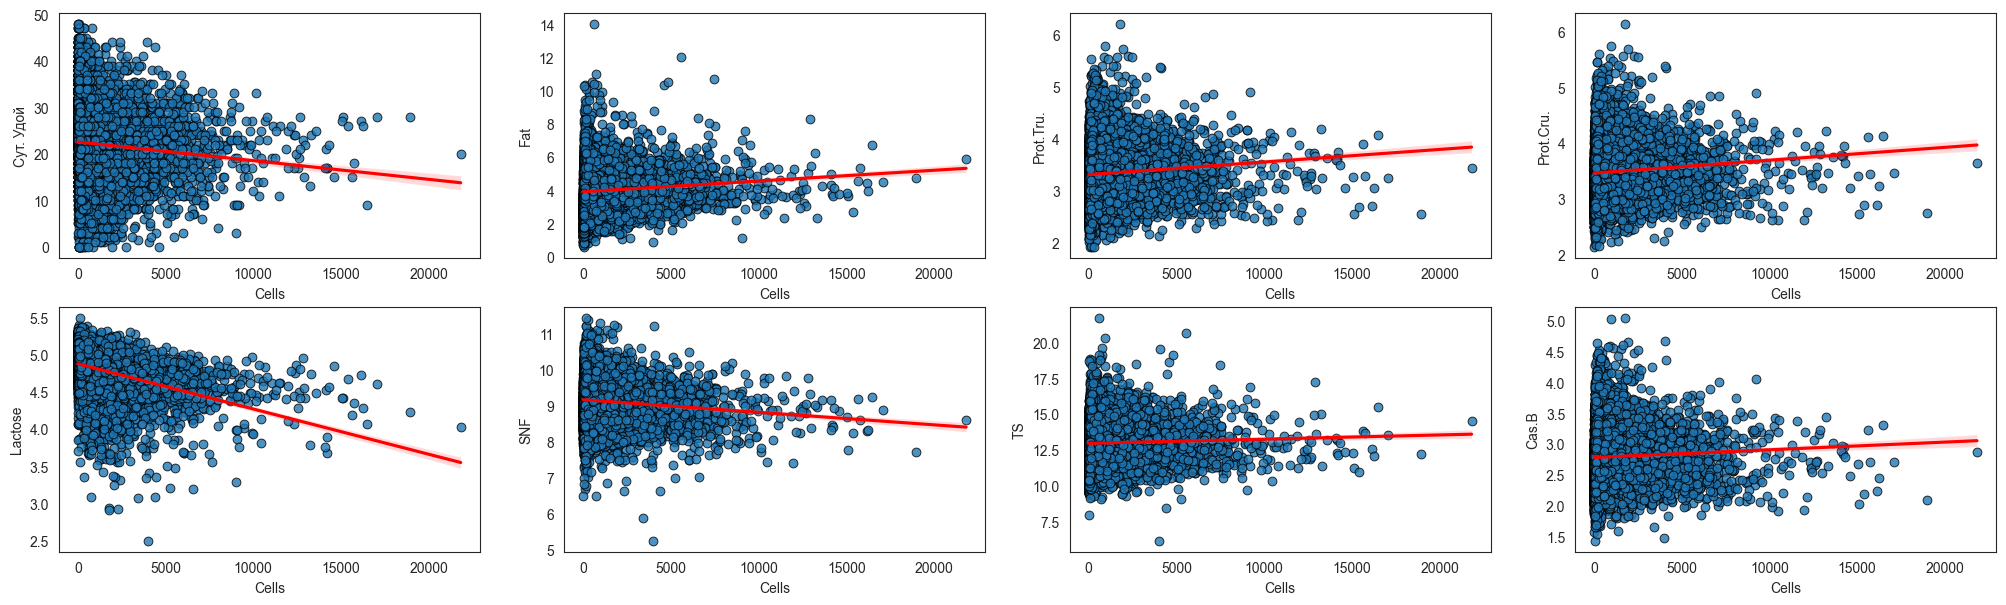

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="Сут. Удой", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="Fat", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="Prot.Tru.", x="Cells",  data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="Prot.Cru.", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="Lactose", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="SNF", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="TS", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="Cas.B", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

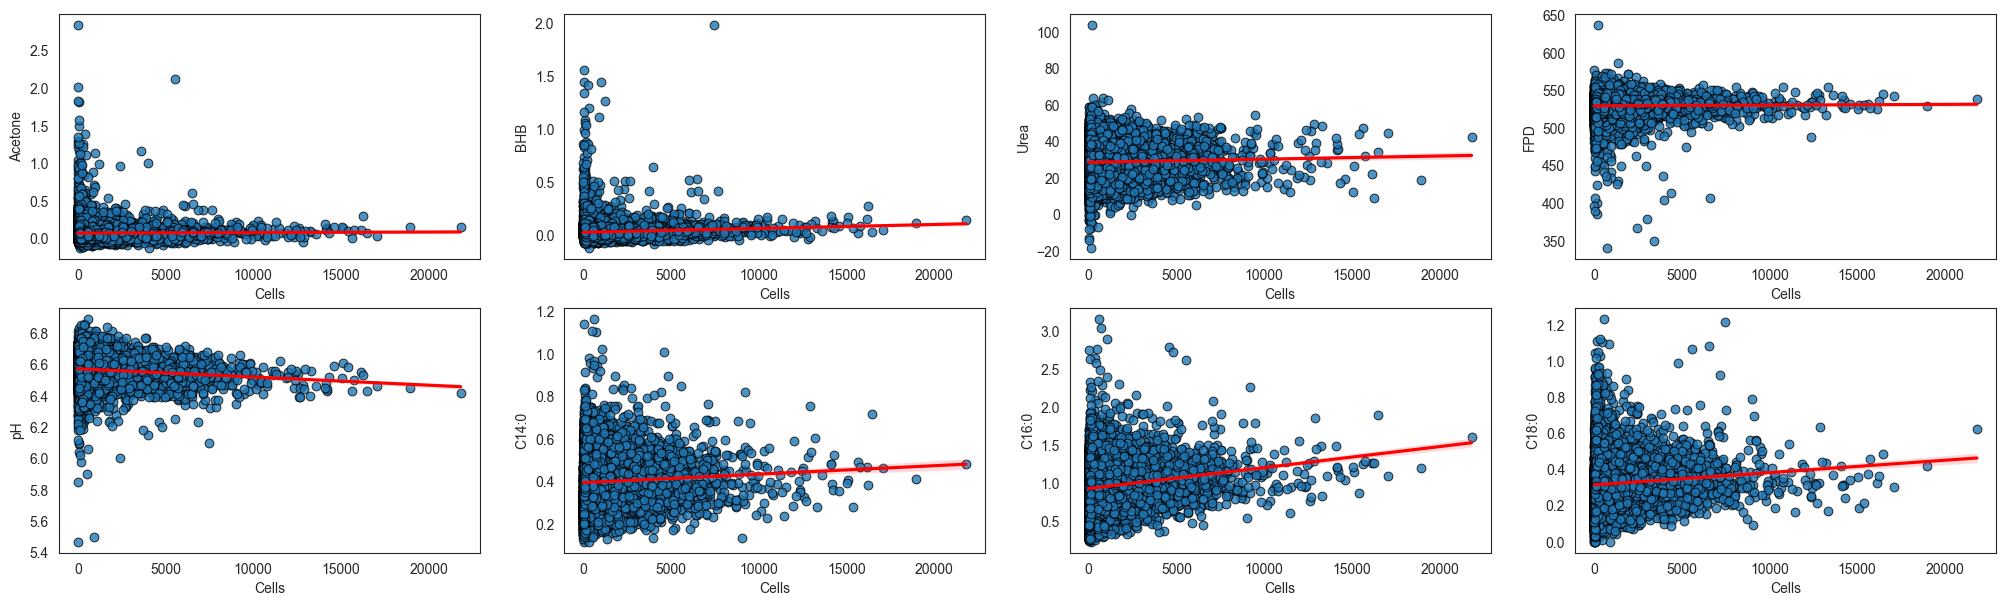

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="Acetone", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="BHB", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="Urea", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="FPD", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="pH", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="C14:0", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="C16:0", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="C18:0", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

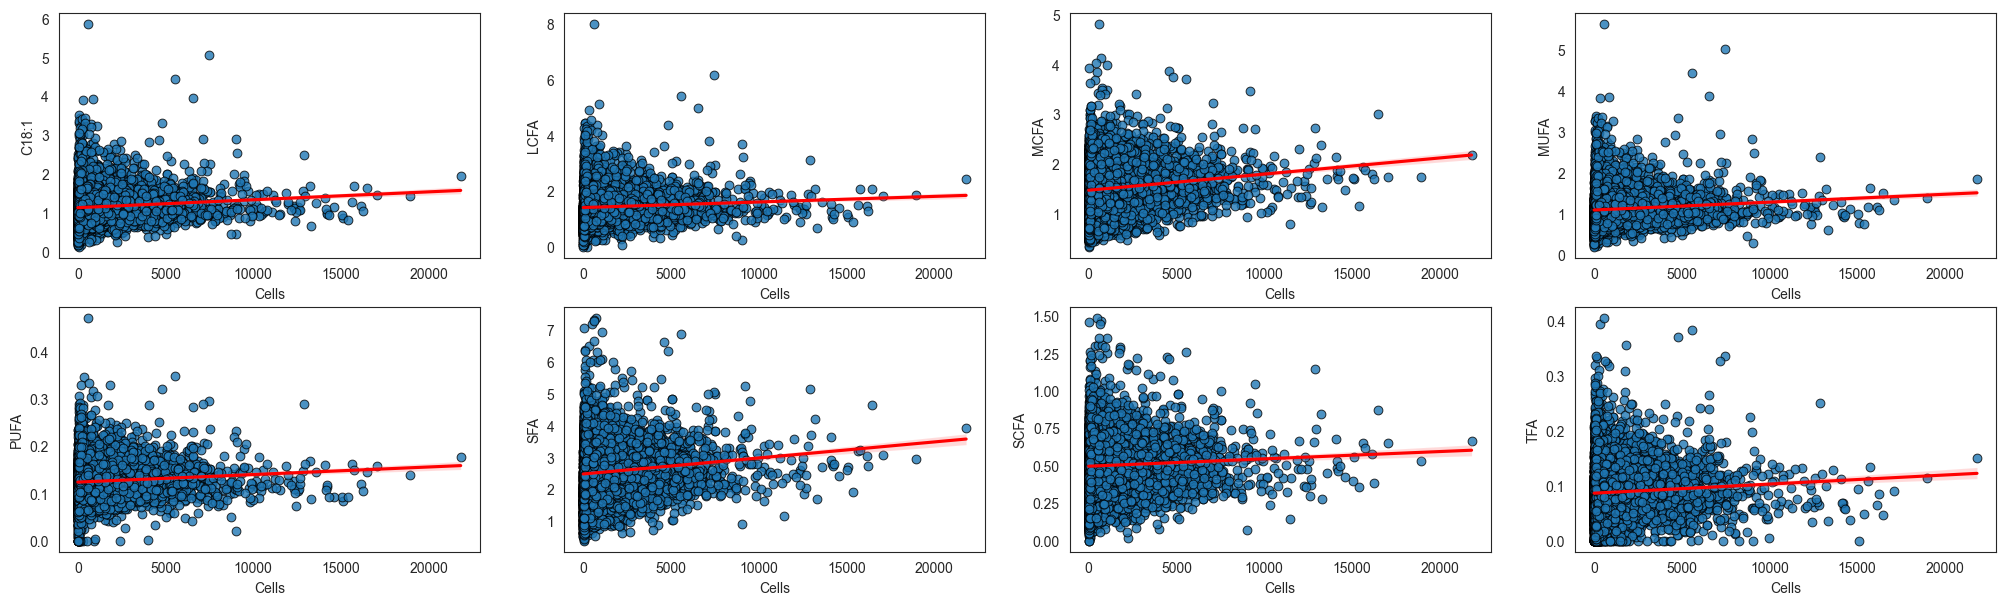

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="C18:1", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="LCFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="MCFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="MUFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="PUFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="SFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="SCFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="TFA", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

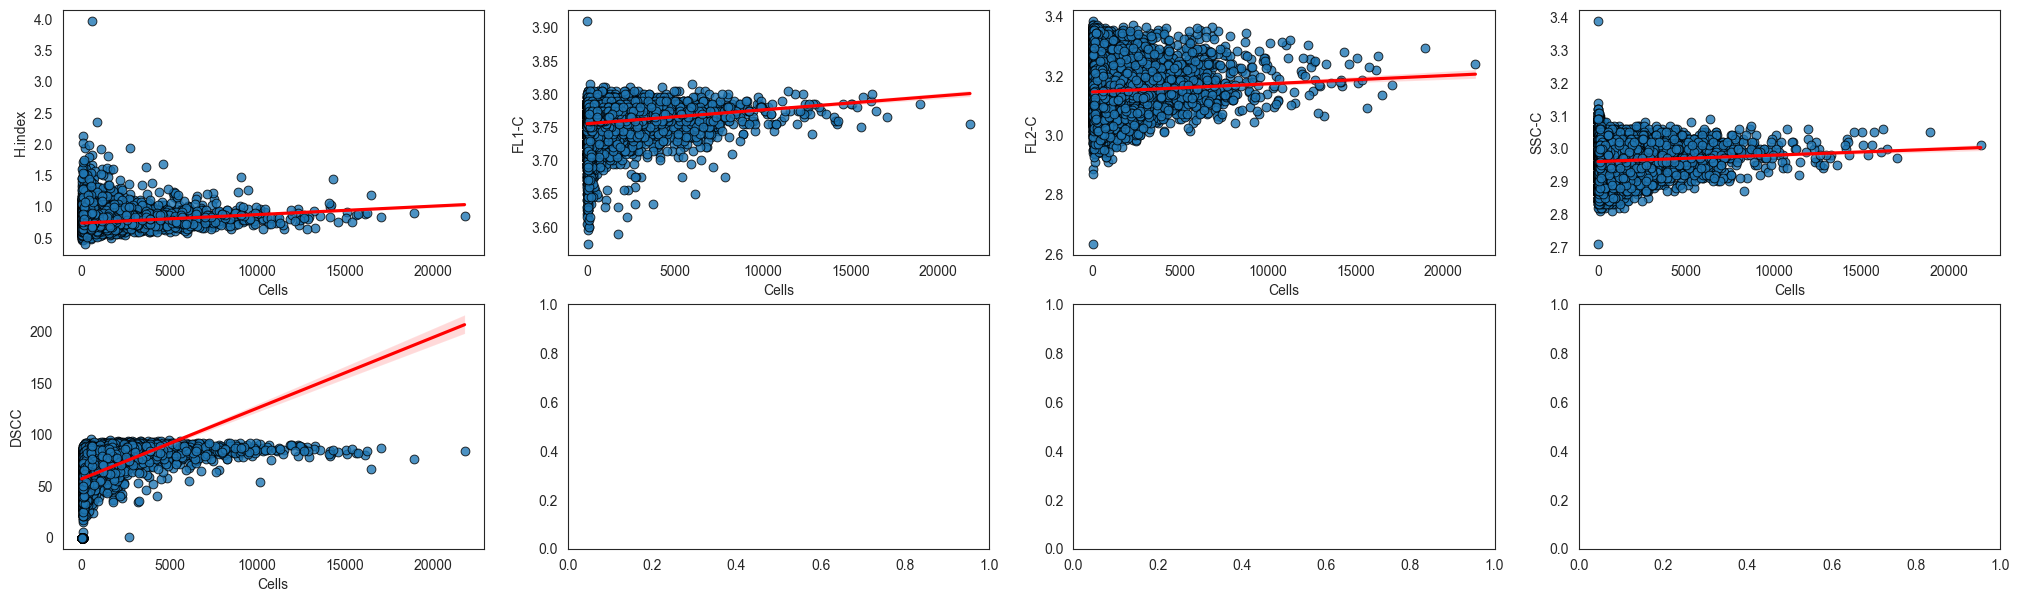

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="H.index", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="FL1-C", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="FL2-C", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="SSC-C", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="DSCC", x="Cells", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);

<AxesSubplot: ylabel='Frequency'>

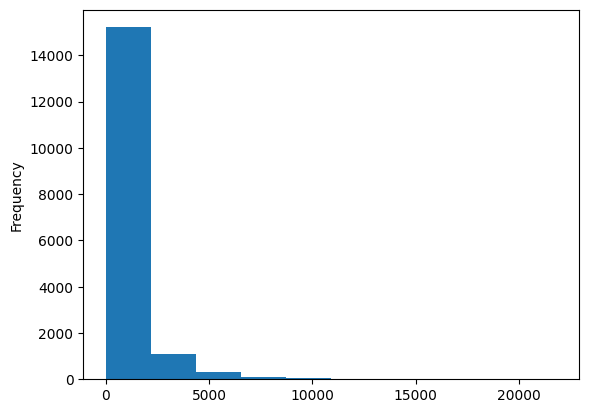

In [144]:
features['Cells'].plot(kind='hist')

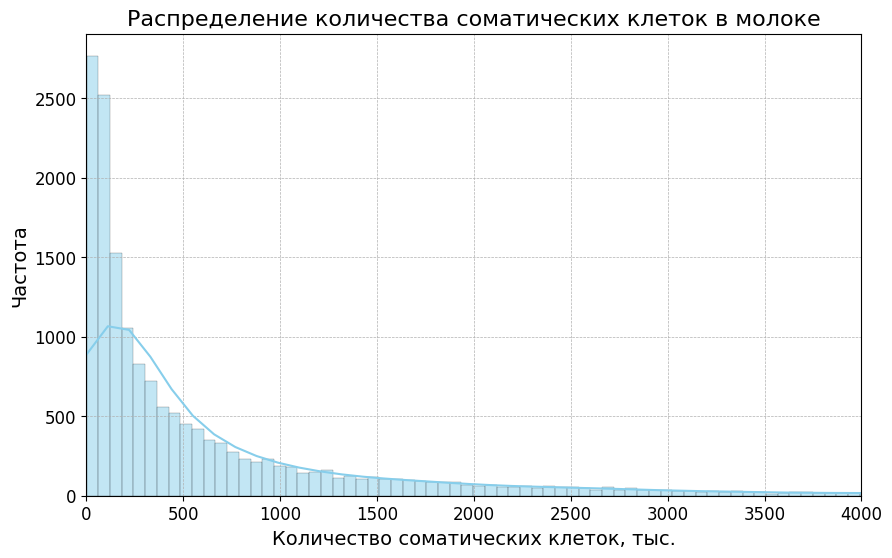

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(features['Cells'], kde=True, color='skyblue')
plt.title('Распределение количества соматических клеток в молоке', fontsize=16)
plt.xlabel('Количество соматических клеток, тыс.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.xlim(0, 4000)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<AxesSubplot: ylabel='Frequency'>

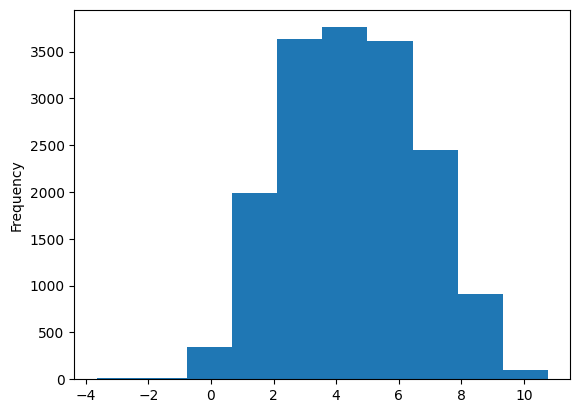

In [145]:
features['SCS'].plot(kind='hist')

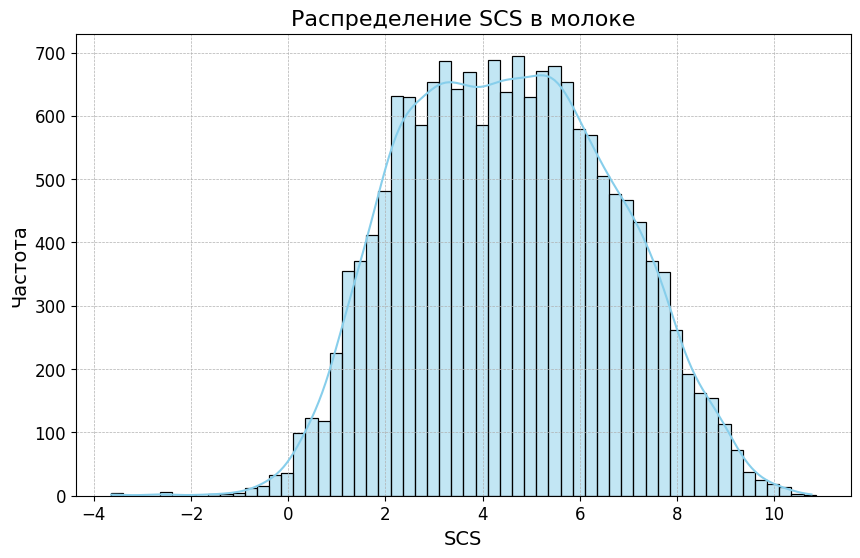

In [130]:
plt.figure(figsize=(10, 6)) 
sns.histplot(features['SCS'], kde=True, color='skyblue', binwidth=0.25) 
plt.title('Распределение SCS в молоке', fontsize=16)
plt.xlabel('SCS', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

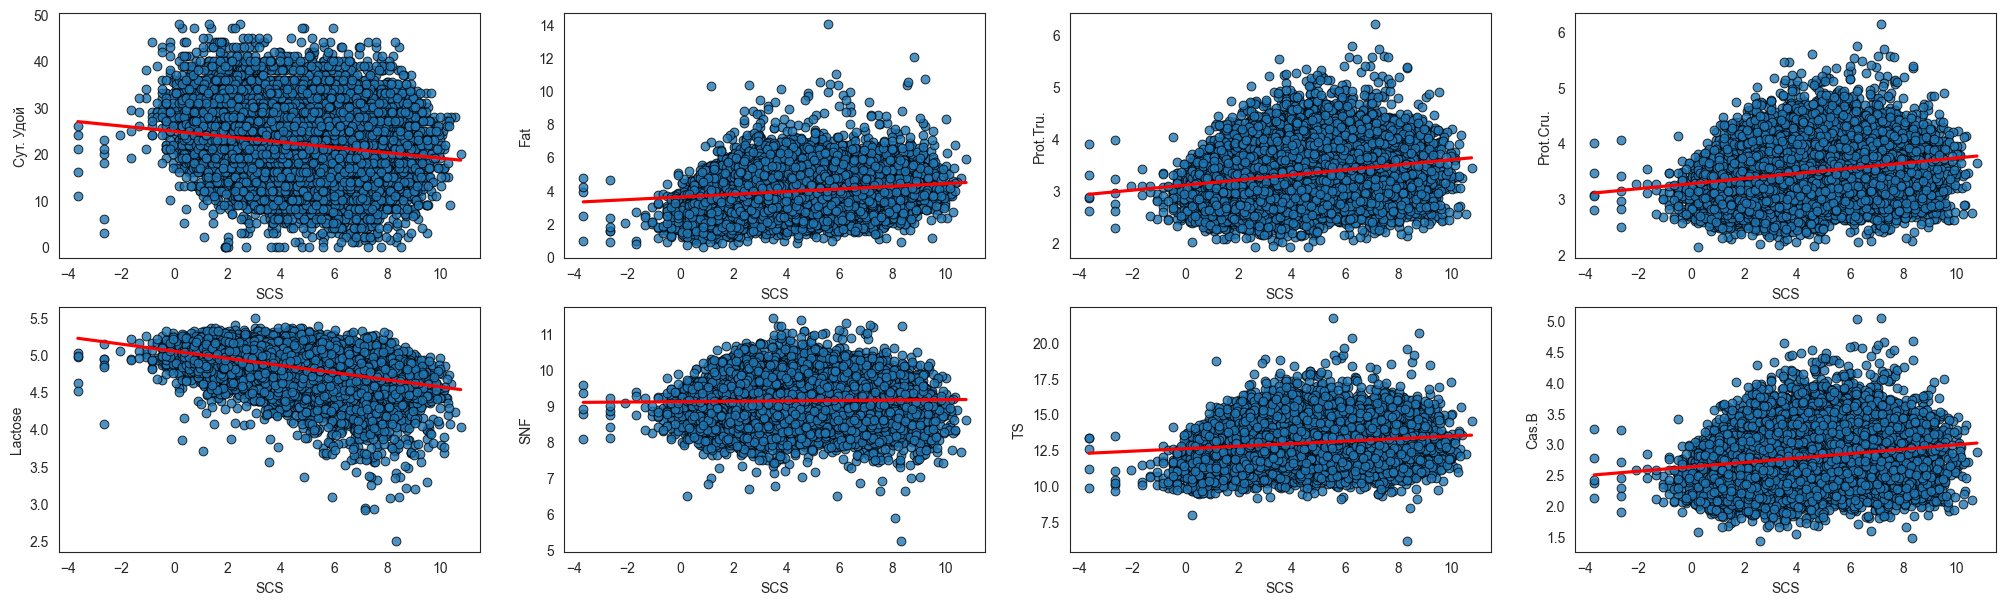

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="Сут. Удой", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="Fat", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="Prot.Tru.", x="SCS",  data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="Prot.Cru.", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="Lactose", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="SNF", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="TS", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="Cas.B", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

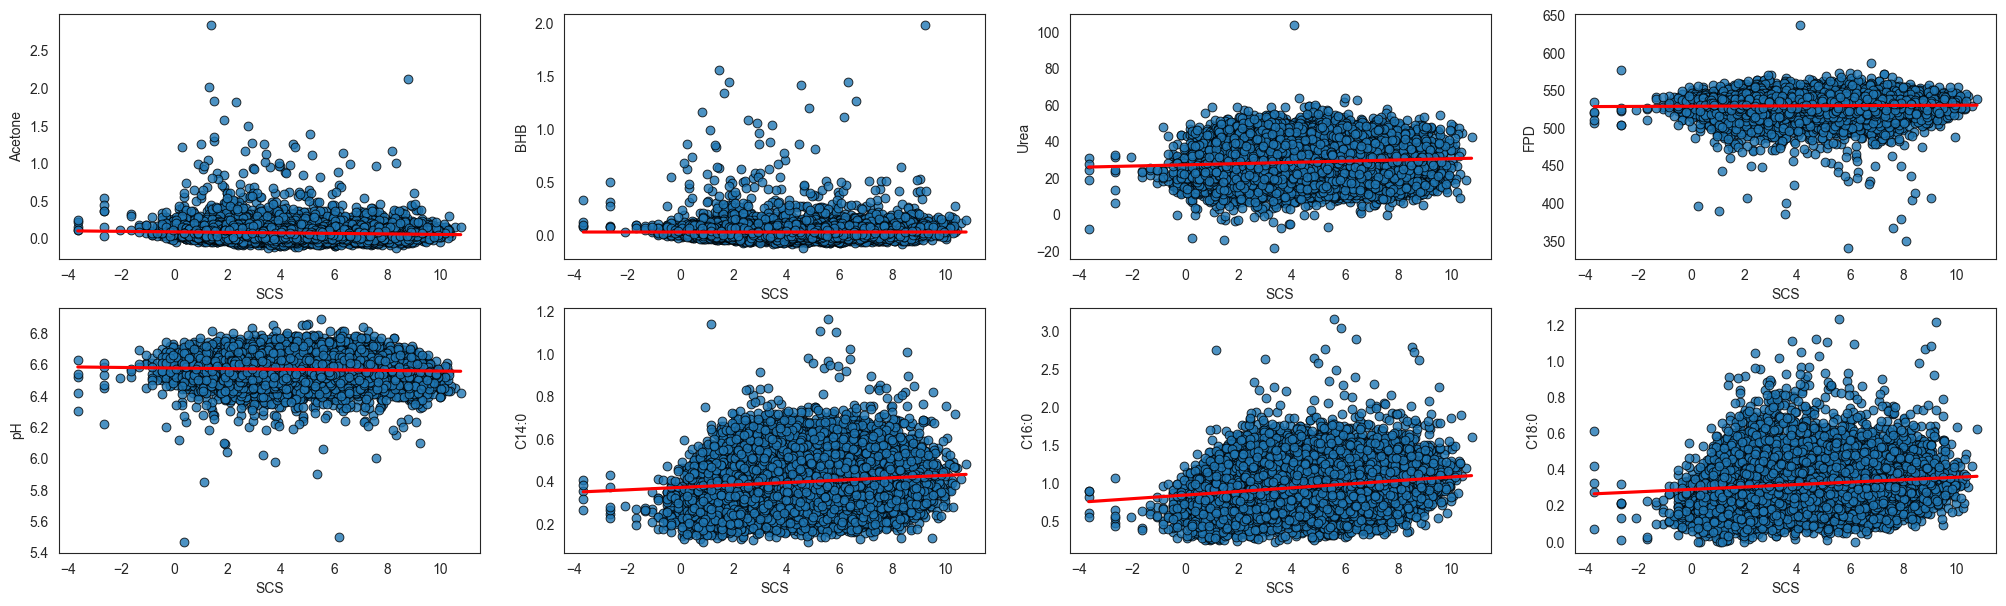

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="Acetone", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="BHB", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="Urea", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="FPD", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="pH", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="C14:0", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="C16:0", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="C18:0", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

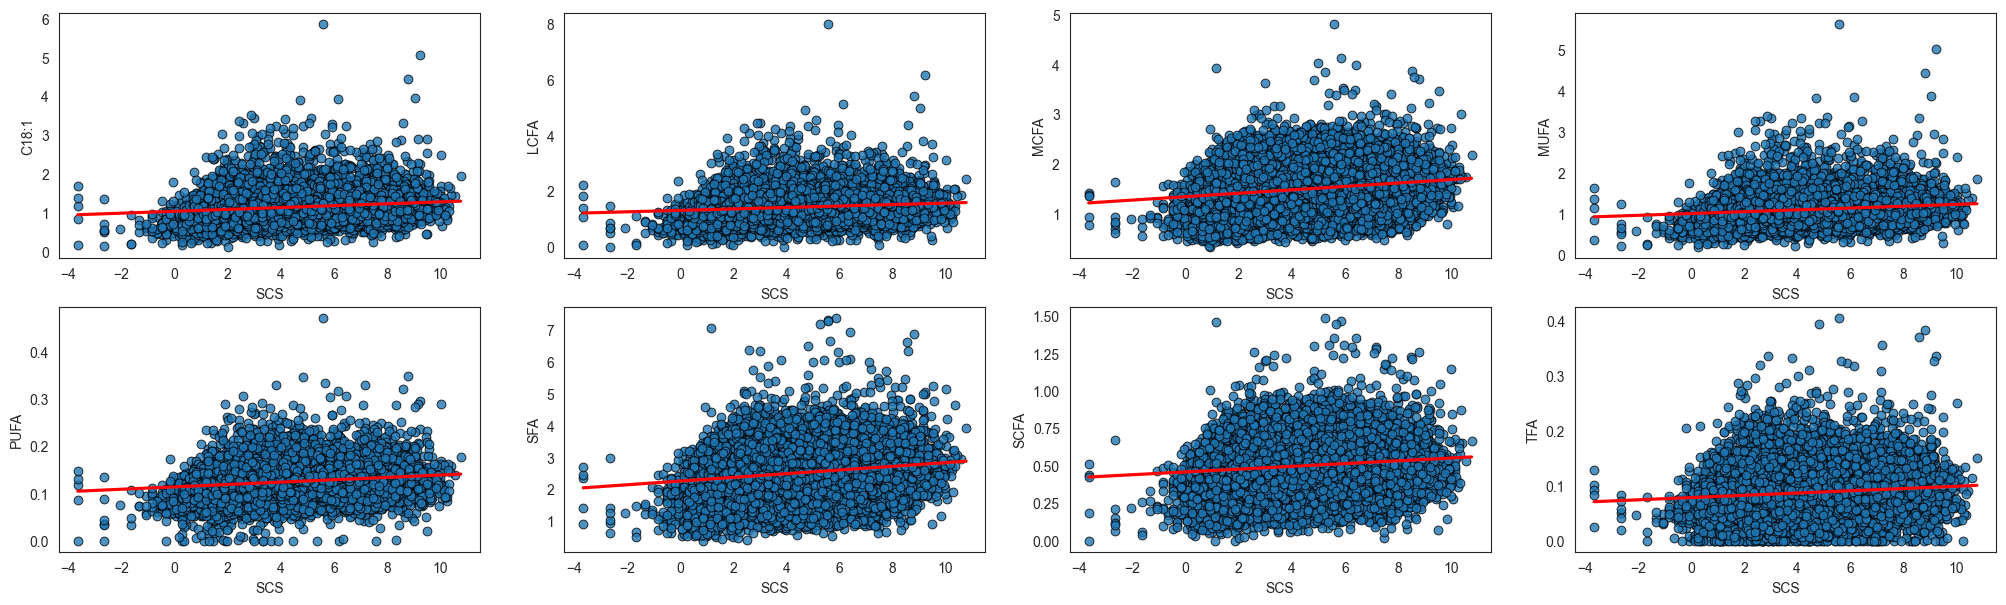

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="C18:1", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="LCFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="MCFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="MUFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="PUFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);
sns.regplot(y="SFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][1]);
sns.regplot(y="SCFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][2]);
sns.regplot(y="TFA", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][3]);

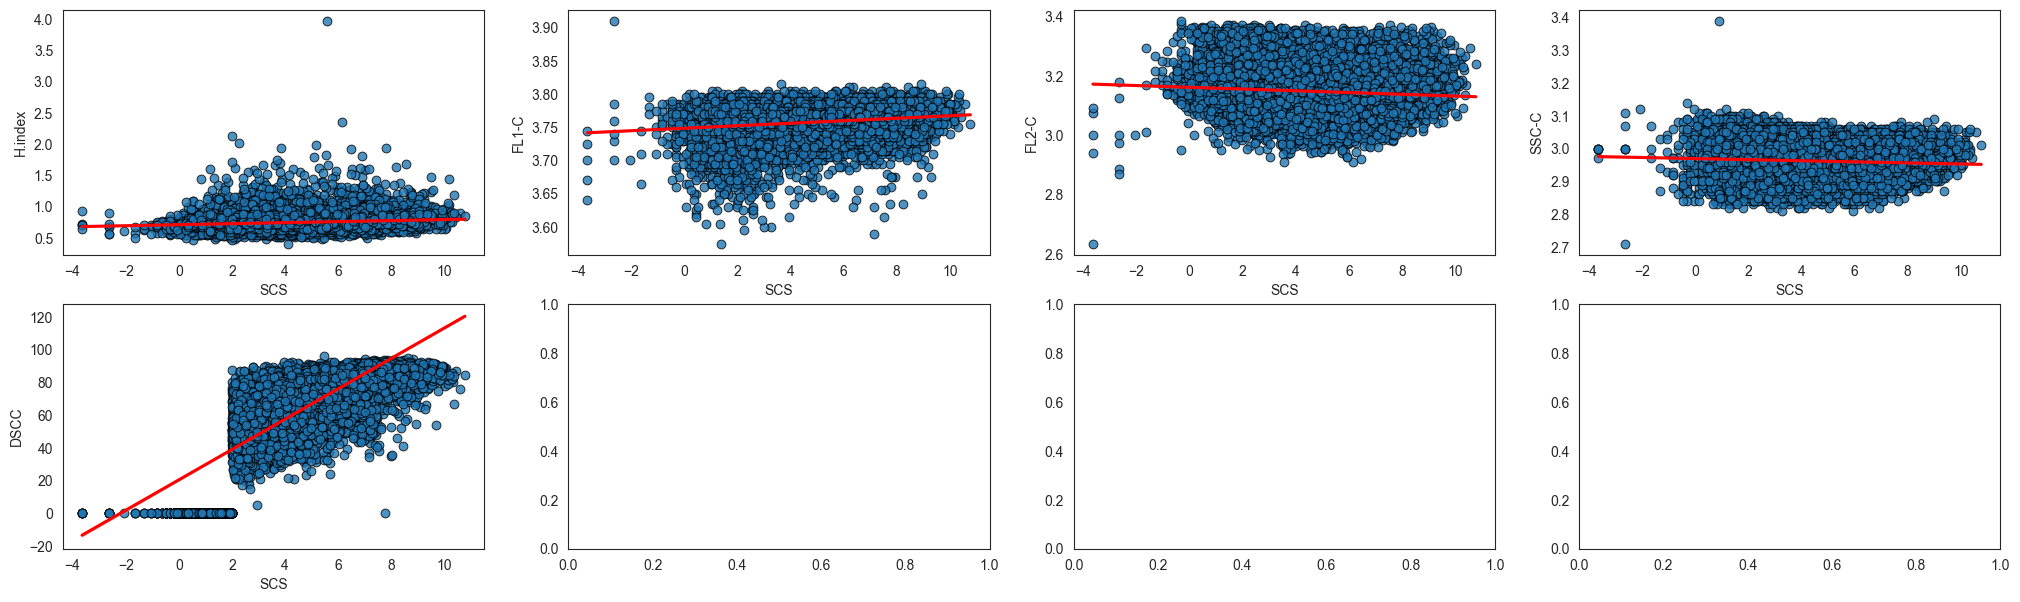

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 7))
sns.regplot(y="H.index", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][0]);
sns.regplot(y="FL1-C", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][1]);
sns.regplot(y="FL2-C", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][2]);
sns.regplot(y="SSC-C", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[0][3]);
sns.regplot(y="DSCC", x="SCS", data=df, order=1,
            scatter_kws={'alpha':0.8, 's': 40,
                 'linewidths': .7, 'edgecolors':'black'}, line_kws={"color": "red", 'alpha': 1}, ax=axes[1][0]);

### Анализ спектра

In [154]:
spectra.describe()

240           241           242           243           244   \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.197323      1.188117      1.181301      1.172442      1.163994   
std        0.040458      0.038834      0.037626      0.036003      0.034357   
min        1.065042      1.059998      1.056675      1.053105      1.050660   
25%        1.170149      1.162087      1.156103      1.148369      1.141032   
50%        1.194943      1.185866      1.179171      1.170400      1.162027   
75%        1.221426      1.211264      1.203707      1.193853      1.184399   
max        1.539278      1.516611      1.499512      1.476520      1.453546   

               245           246           247           248           249   \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.156046      1.148578      1.141313      1.133520      1.123923   
std        0.032690      0.031022      0.029388      0.027830      0.026383   
min        1.049299      1.048762      1.047283      1.043872      1.038536   
25%        1.134110      1.127730      1.121533      1.114847      1.106308   
50%        1.154224      1.146900      1.139810      1.132141      1.122622   
75%        1.175501      1.167183      1.158878      1.150235      1.139798   
max        1.430828      1.408664      1.387276      1.366564      1.345875   

       ...          1290          1291          1292          1293  \
count  ...  16847.000000  16847.000000  16847.000000  16847.000000   
mean   ...      0.994655      0.994246      0.993754      0.993152   
std    ...      0.012293      0.012359      0.012532      0.012710   
min    ...      0.947048      0.945011      0.946900      0.944452   
25%    ...      0.986360      0.985877      0.985102      0.984430   
50%    ...      0.994386      0.994101      0.993597      0.993021   
75%    ...      1.002699      1.002355      1.002061      1.001621   
max    ...      1.044252      1.047820      1.047996      1.044311   

               1294          1295          1296          1297          1298  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       0.992436      0.991621      0.990724      0.989763      0.988753   
std        0.012795      0.012778      0.012732      0.012716      0.012720   
min        0.942054      0.939314      0.943941      0.942073      0.943935   
25%        0.983704      0.982935      0.982075      0.981284      0.980196   
50%        0.992203      0.991395      0.990539      0.989519      0.988418   
75%        1.001092      1.000101      0.999129      0.998242      0.997101   
max        1.044666      1.043319      1.045123      1.046125      1.044565   

               1299  
count  16847.000000  
mean       0.986005  
std        0.012684  
min        0.940976  
25%        0.977397  
50%        0.985754  
75%        0.994271  
max        1.040786  

[8 rows x 1060 columns]

<Axes: >

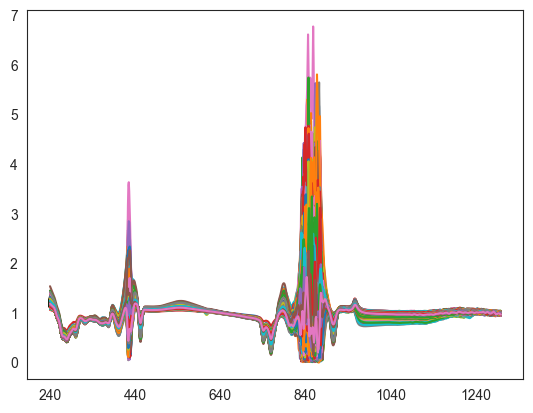

In [246]:
spectra.T.iloc[:,:].plot(legend=False)

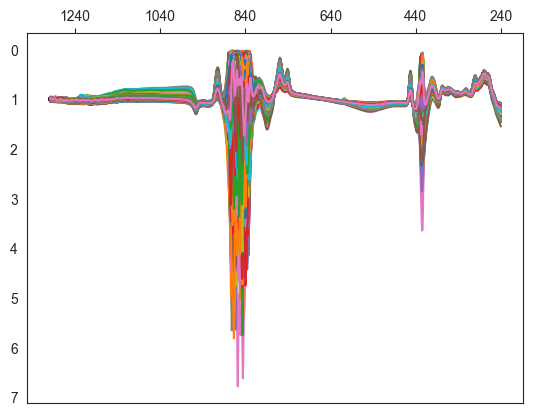

In [251]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.invert_xaxis()
spectra.T.iloc[:,:].plot(legend=False, ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

<Axes: >

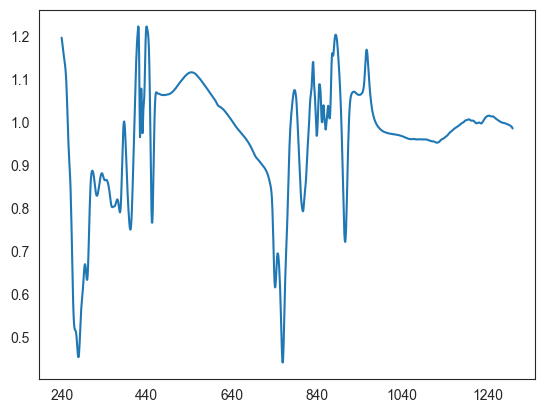

In [247]:
spectra.iloc[:,:].mean().T.plot()

In [20]:
df_cells = spectra
df_scs = spectra
df_cells = pd.concat([df_cells,features['SCC']], axis=1)
df_scs = pd.concat([df_scs,features['SCS']], axis=1)

In [21]:
df_cells.describe()

240           241           242           243           244  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.197323      1.188117      1.181301      1.172442      1.163994   
std        0.040458      0.038834      0.037626      0.036003      0.034357   
min        1.065042      1.059998      1.056675      1.053105      1.050660   
25%        1.170149      1.162087      1.156103      1.148369      1.141032   
50%        1.194943      1.185866      1.179171      1.170400      1.162027   
75%        1.221426      1.211264      1.203707      1.193853      1.184399   
max        1.539278      1.516611      1.499512      1.476520      1.453546   

                245           246           247           248           249  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.156046      1.148578      1.141313      1.133520      1.123923   
std        0.032690      0.031022      0.029388      0.027830      0.026383   
min        1.049299      1.048762      1.047283      1.043872      1.038536   
25%        1.134110      1.127730      1.121533      1.114847      1.106308   
50%        1.154224      1.146900      1.139810      1.132141      1.122622   
75%        1.175501      1.167183      1.158878      1.150235      1.139798   
max        1.430828      1.408664      1.387276      1.366564      1.345875   

       ...          1291          1292          1293          1294  \
count  ...  16847.000000  16847.000000  16847.000000  16847.000000   
mean   ...      0.994246      0.993754      0.993152      0.992436   
std    ...      0.012359      0.012532      0.012710      0.012795   
min    ...      0.945011      0.946900      0.944452      0.942054   
25%    ...      0.985877      0.985102      0.984430      0.983704   
50%    ...      0.994101      0.993597      0.993021      0.992203   
75%    ...      1.002355      1.002061      1.001621      1.001092   
max    ...      1.047820      1.047996      1.044311      1.044666   

               1295          1296          1297          1298          1299  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       0.991621      0.990724      0.989763      0.988753      0.986005   
std        0.012778      0.012732      0.012716      0.012720      0.012684   
min        0.939314      0.943941      0.942073      0.943935      0.940976   
25%        0.982935      0.982075      0.981284      0.980196      0.977397   
50%        0.991395      0.990539      0.989519      0.988418      0.985754   
75%        1.000101      0.999129      0.998242      0.997101      0.994271   
max        1.043319      1.045123      1.046125      1.044565      1.040786   

                SCC  
count  16847.000000  
mean     805.522764  
std     1418.954284  
min        1.000000  
25%       92.000000  
50%      281.000000  
75%      867.500000  
max    21826.000000  

[8 rows x 1061 columns]

In [22]:
df_scs.describe()

240           241           242           243           244  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.197323      1.188117      1.181301      1.172442      1.163994   
std        0.040458      0.038834      0.037626      0.036003      0.034357   
min        1.065042      1.059998      1.056675      1.053105      1.050660   
25%        1.170149      1.162087      1.156103      1.148369      1.141032   
50%        1.194943      1.185866      1.179171      1.170400      1.162027   
75%        1.221426      1.211264      1.203707      1.193853      1.184399   
max        1.539278      1.516611      1.499512      1.476520      1.453546   

                245           246           247           248           249  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       1.156046      1.148578      1.141313      1.133520      1.123923   
std        0.032690      0.031022      0.029388      0.027830      0.026383   
min        1.049299      1.048762      1.047283      1.043872      1.038536   
25%        1.134110      1.127730      1.121533      1.114847      1.106308   
50%        1.154224      1.146900      1.139810      1.132141      1.122622   
75%        1.175501      1.167183      1.158878      1.150235      1.139798   
max        1.430828      1.408664      1.387276      1.366564      1.345875   

       ...          1291          1292          1293          1294  \
count  ...  16847.000000  16847.000000  16847.000000  16847.000000   
mean   ...      0.994246      0.993754      0.993152      0.992436   
std    ...      0.012359      0.012532      0.012710      0.012795   
min    ...      0.945011      0.946900      0.944452      0.942054   
25%    ...      0.985877      0.985102      0.984430      0.983704   
50%    ...      0.994101      0.993597      0.993021      0.992203   
75%    ...      1.002355      1.002061      1.001621      1.001092   
max    ...      1.047820      1.047996      1.044311      1.044666   

               1295          1296          1297          1298          1299  \
count  16847.000000  16847.000000  16847.000000  16847.000000  16847.000000   
mean       0.991621      0.990724      0.989763      0.988753      0.986005   
std        0.012778      0.012732      0.012716      0.012720      0.012684   
min        0.939314      0.943941      0.942073      0.943935      0.940976   
25%        0.982935      0.982075      0.981284      0.980196      0.977397   
50%        0.991395      0.990539      0.989519      0.988418      0.985754   
75%        1.000101      0.999129      0.998242      0.997101      0.994271   
max        1.043319      1.045123      1.046125      1.044565      1.040786   

                SCS  
count  16847.000000  
mean       4.535309  
std        2.131538  
min       -3.643856  
25%        2.879706  
50%        4.490570  
75%        6.116864  
max       10.769904  

[8 rows x 1061 columns]

In [141]:
df = df_cells

In [125]:
def group_scс(df):
    if df['SCC'] <= 100:
        val = 1
    elif df['SCC'] <= 200:
        val = 2
    elif df['SCC'] <= 300:
        val = 3
    elif df['SCC'] <= 400:
        val = 4
    elif df['SCC'] <= 500:
        val = 5
    elif df['SCC'] <= 600:
        val = 6
    elif df['SCC'] <= 700:
        val = 7
    elif df['SCC'] <= 800:
        val = 8
    elif df['SCC'] <= 900:
        val = 9
    elif df['SCC'] <= 1000:
        val = 10
    else:
        val = 11
    return val

In [142]:
def group_scс(df):
    if df['SCC'] <= 200:
        val = 1
    elif df['SCC'] <= 500:
        val = 2
    elif df['SCC'] <= 750:
        val = 3
    elif df['SCC'] <= 1000:
        val = 4
    else:
        val = 5
    return val

In [143]:
df['group_scc'] = df.apply(group_scс, axis=1)

In [144]:
df_somat = pd.DataFrame()

In [129]:
df_somat['1'] = df[df['group_scc'] == 1].iloc[:,:-3].T.mean(axis=1)
df_somat['2'] = df[df['group_scc'] == 2].iloc[:,:-3].T.mean(axis=1)
df_somat['3'] = df[df['group_scc'] == 3].iloc[:,:-3].T.mean(axis=1)
df_somat['4'] = df[df['group_scc'] == 4].iloc[:,:-3].T.mean(axis=1)
df_somat['5'] = df[df['group_scc'] == 5].iloc[:,:-3].T.mean(axis=1)
df_somat['6'] = df[df['group_scc'] == 6].iloc[:,:-3].T.mean(axis=1)
df_somat['7'] = df[df['group_scc'] == 7].iloc[:,:-3].T.mean(axis=1)
df_somat['8'] = df[df['group_scc'] == 8].iloc[:,:-3].T.mean(axis=1)
df_somat['9'] = df[df['group_scc'] == 9].iloc[:,:-3].T.mean(axis=1)
df_somat['10'] = df[df['group_scc'] == 10].iloc[:,:-3].T.mean(axis=1)
df_somat['11'] = df[df['group_scc'] == 11].iloc[:,:-3].T.mean(axis=1)

In [145]:
df_somat['1'] = df[df['group_scc'] == 1].iloc[:,:-3].T.mean(axis=1)
df_somat['2'] = df[df['group_scc'] == 2].iloc[:,:-3].T.mean(axis=1)
df_somat['3'] = df[df['group_scc'] == 3].iloc[:,:-3].T.mean(axis=1)
df_somat['4'] = df[df['group_scc'] == 4].iloc[:,:-3].T.mean(axis=1)
df_somat['5'] = df[df['group_scc'] == 5].iloc[:,:-3].T.mean(axis=1)

In [146]:
df_somat

1         2         3         4         5
240   1.189354  1.201570  1.202546  1.203874  1.204793
241   1.180376  1.192209  1.193185  1.194484  1.195408
242   1.173740  1.185278  1.186242  1.187518  1.188445
243   1.165144  1.176267  1.177195  1.178430  1.179361
244   1.156994  1.167663  1.168534  1.169719  1.170641
...        ...       ...       ...       ...       ...
1294  0.991004  0.992718  0.993218  0.993824  0.994235
1295  0.990213  0.991955  0.992319  0.992867  0.993395
1296  0.989386  0.991125  0.991268  0.991757  0.992422
1297  0.988520  0.990214  0.990156  0.990575  0.991353
1298  0.987596  0.989214  0.989074  0.989391  0.990242

[1059 rows x 5 columns]

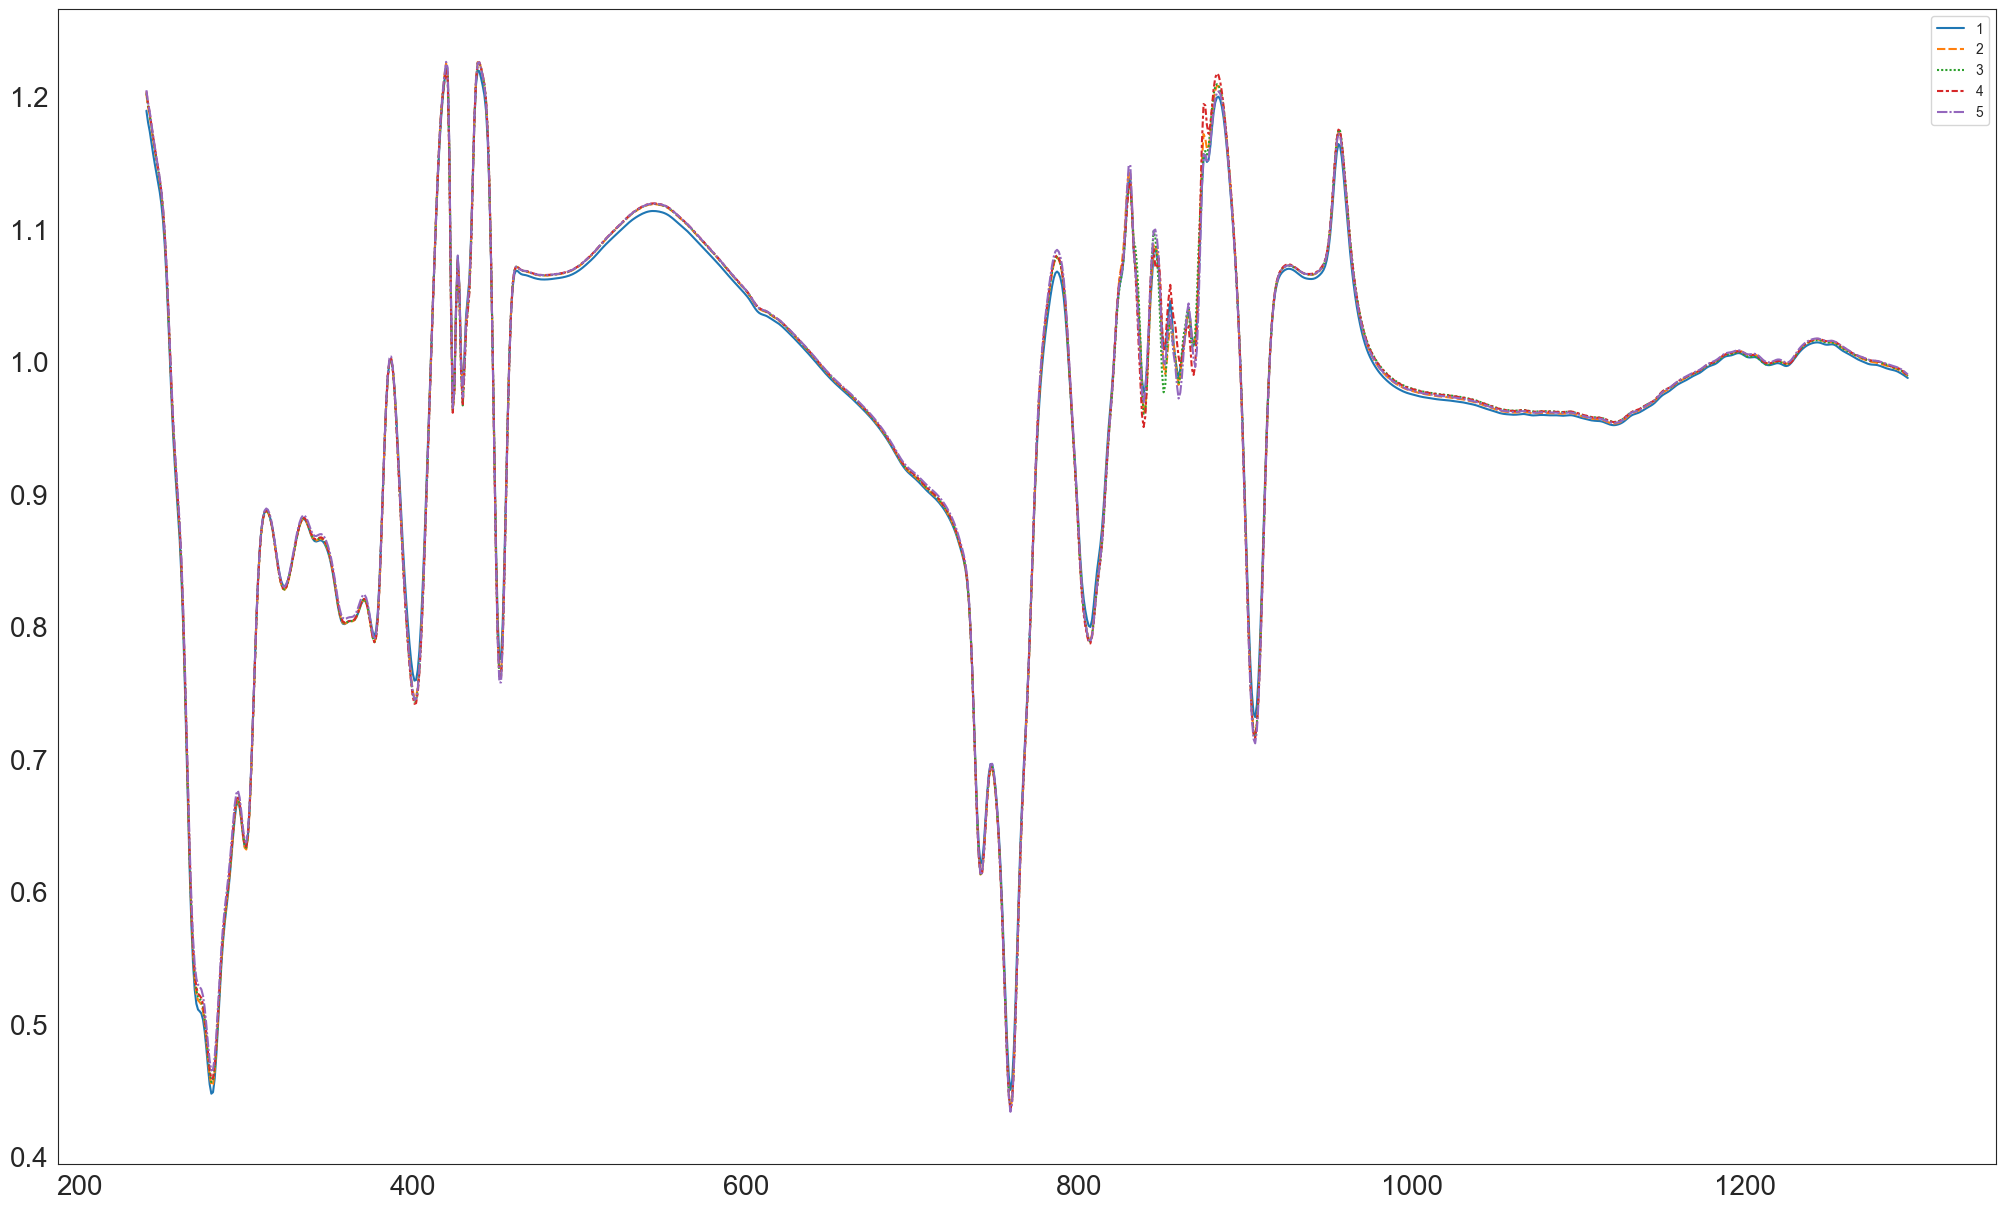

In [120]:
fig = plt.figure(figsize=(25, 15))
ax = sns.lineplot(data=df_somat)
sns.set_style('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# here set the labelsize by 20
plt.show()

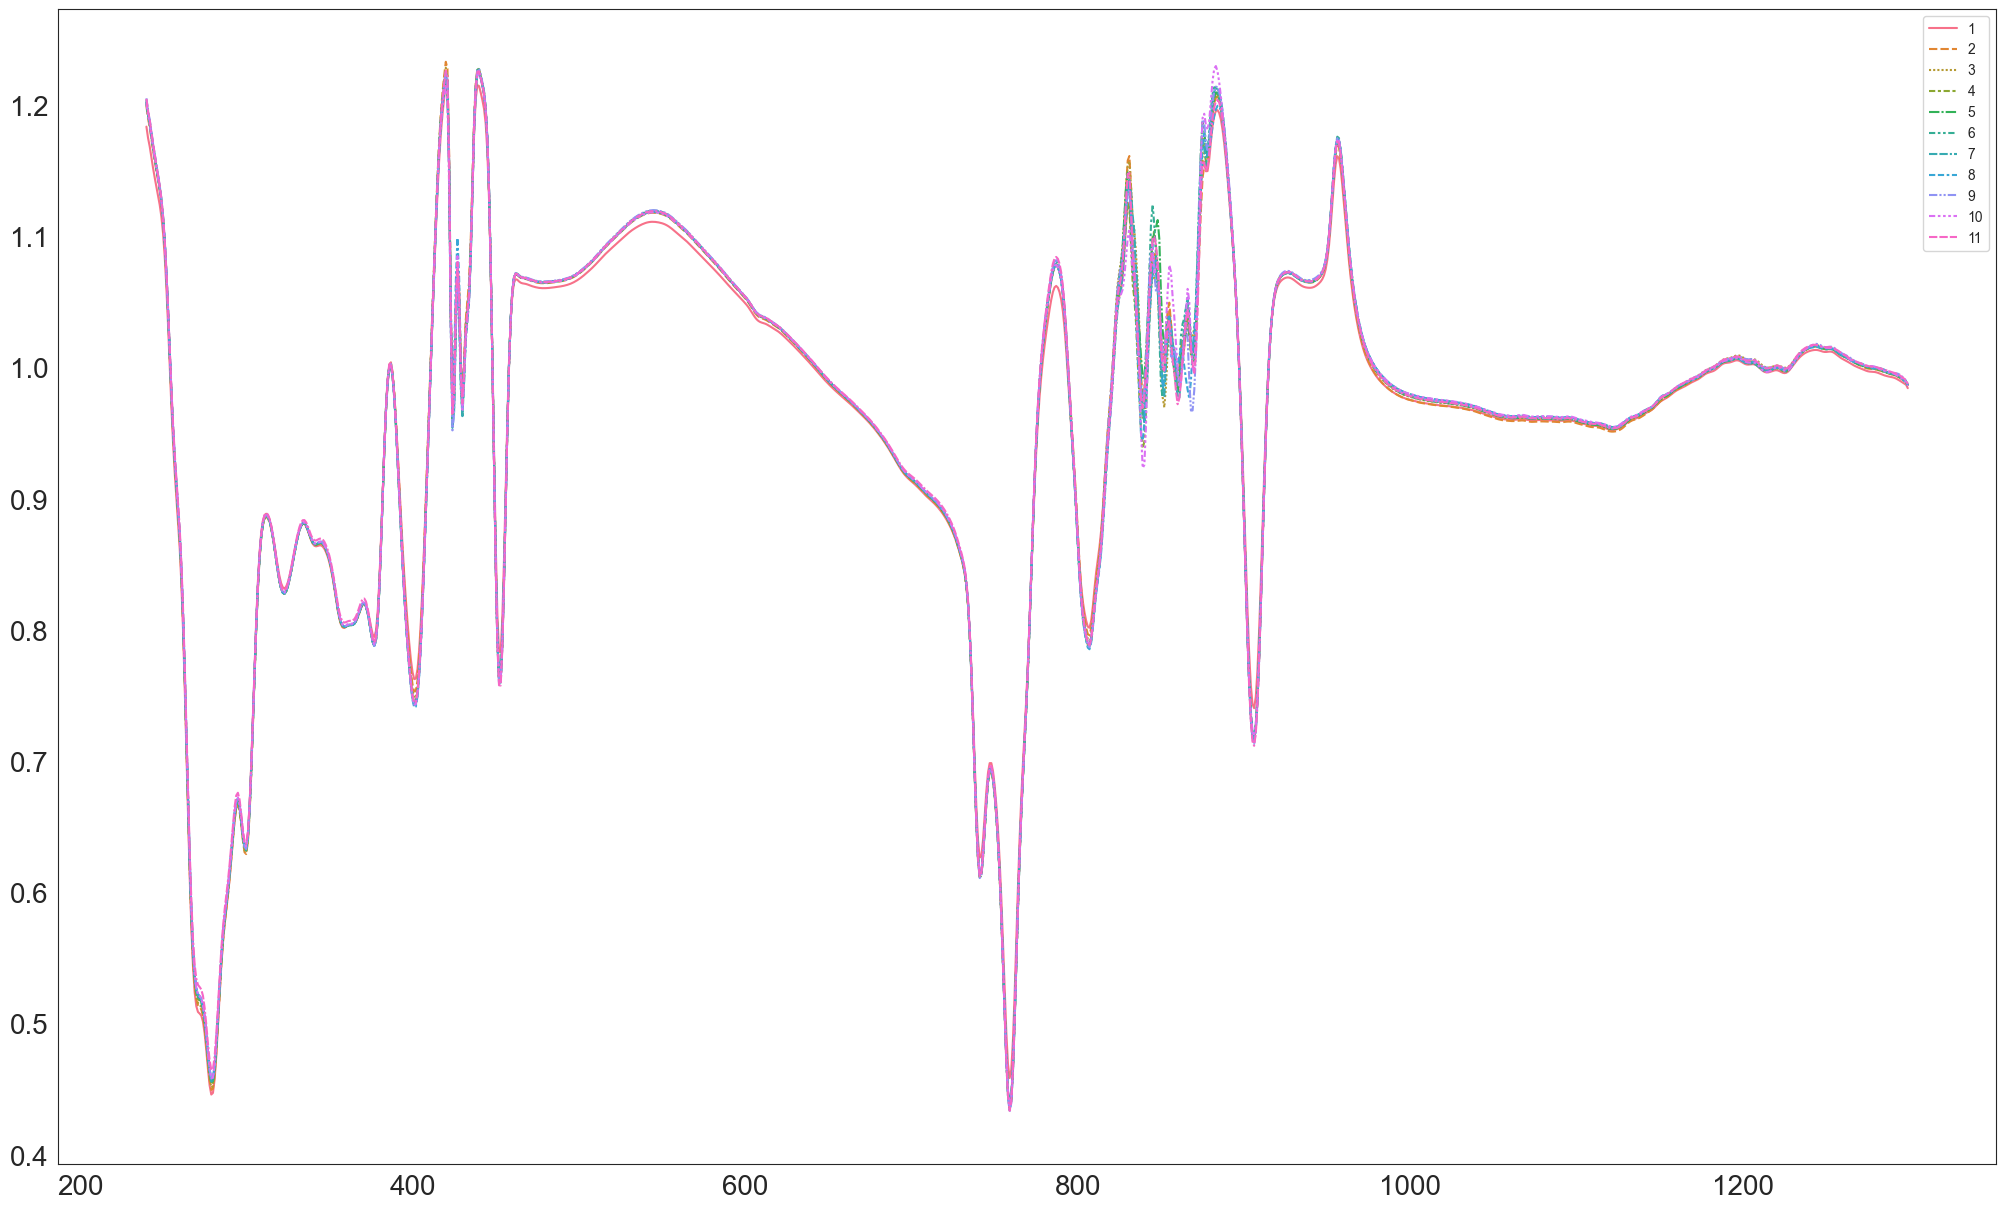

In [129]:
fig = plt.figure(figsize=(25, 15))
ax = sns.lineplot(data=df_somat)
sns.set_style('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

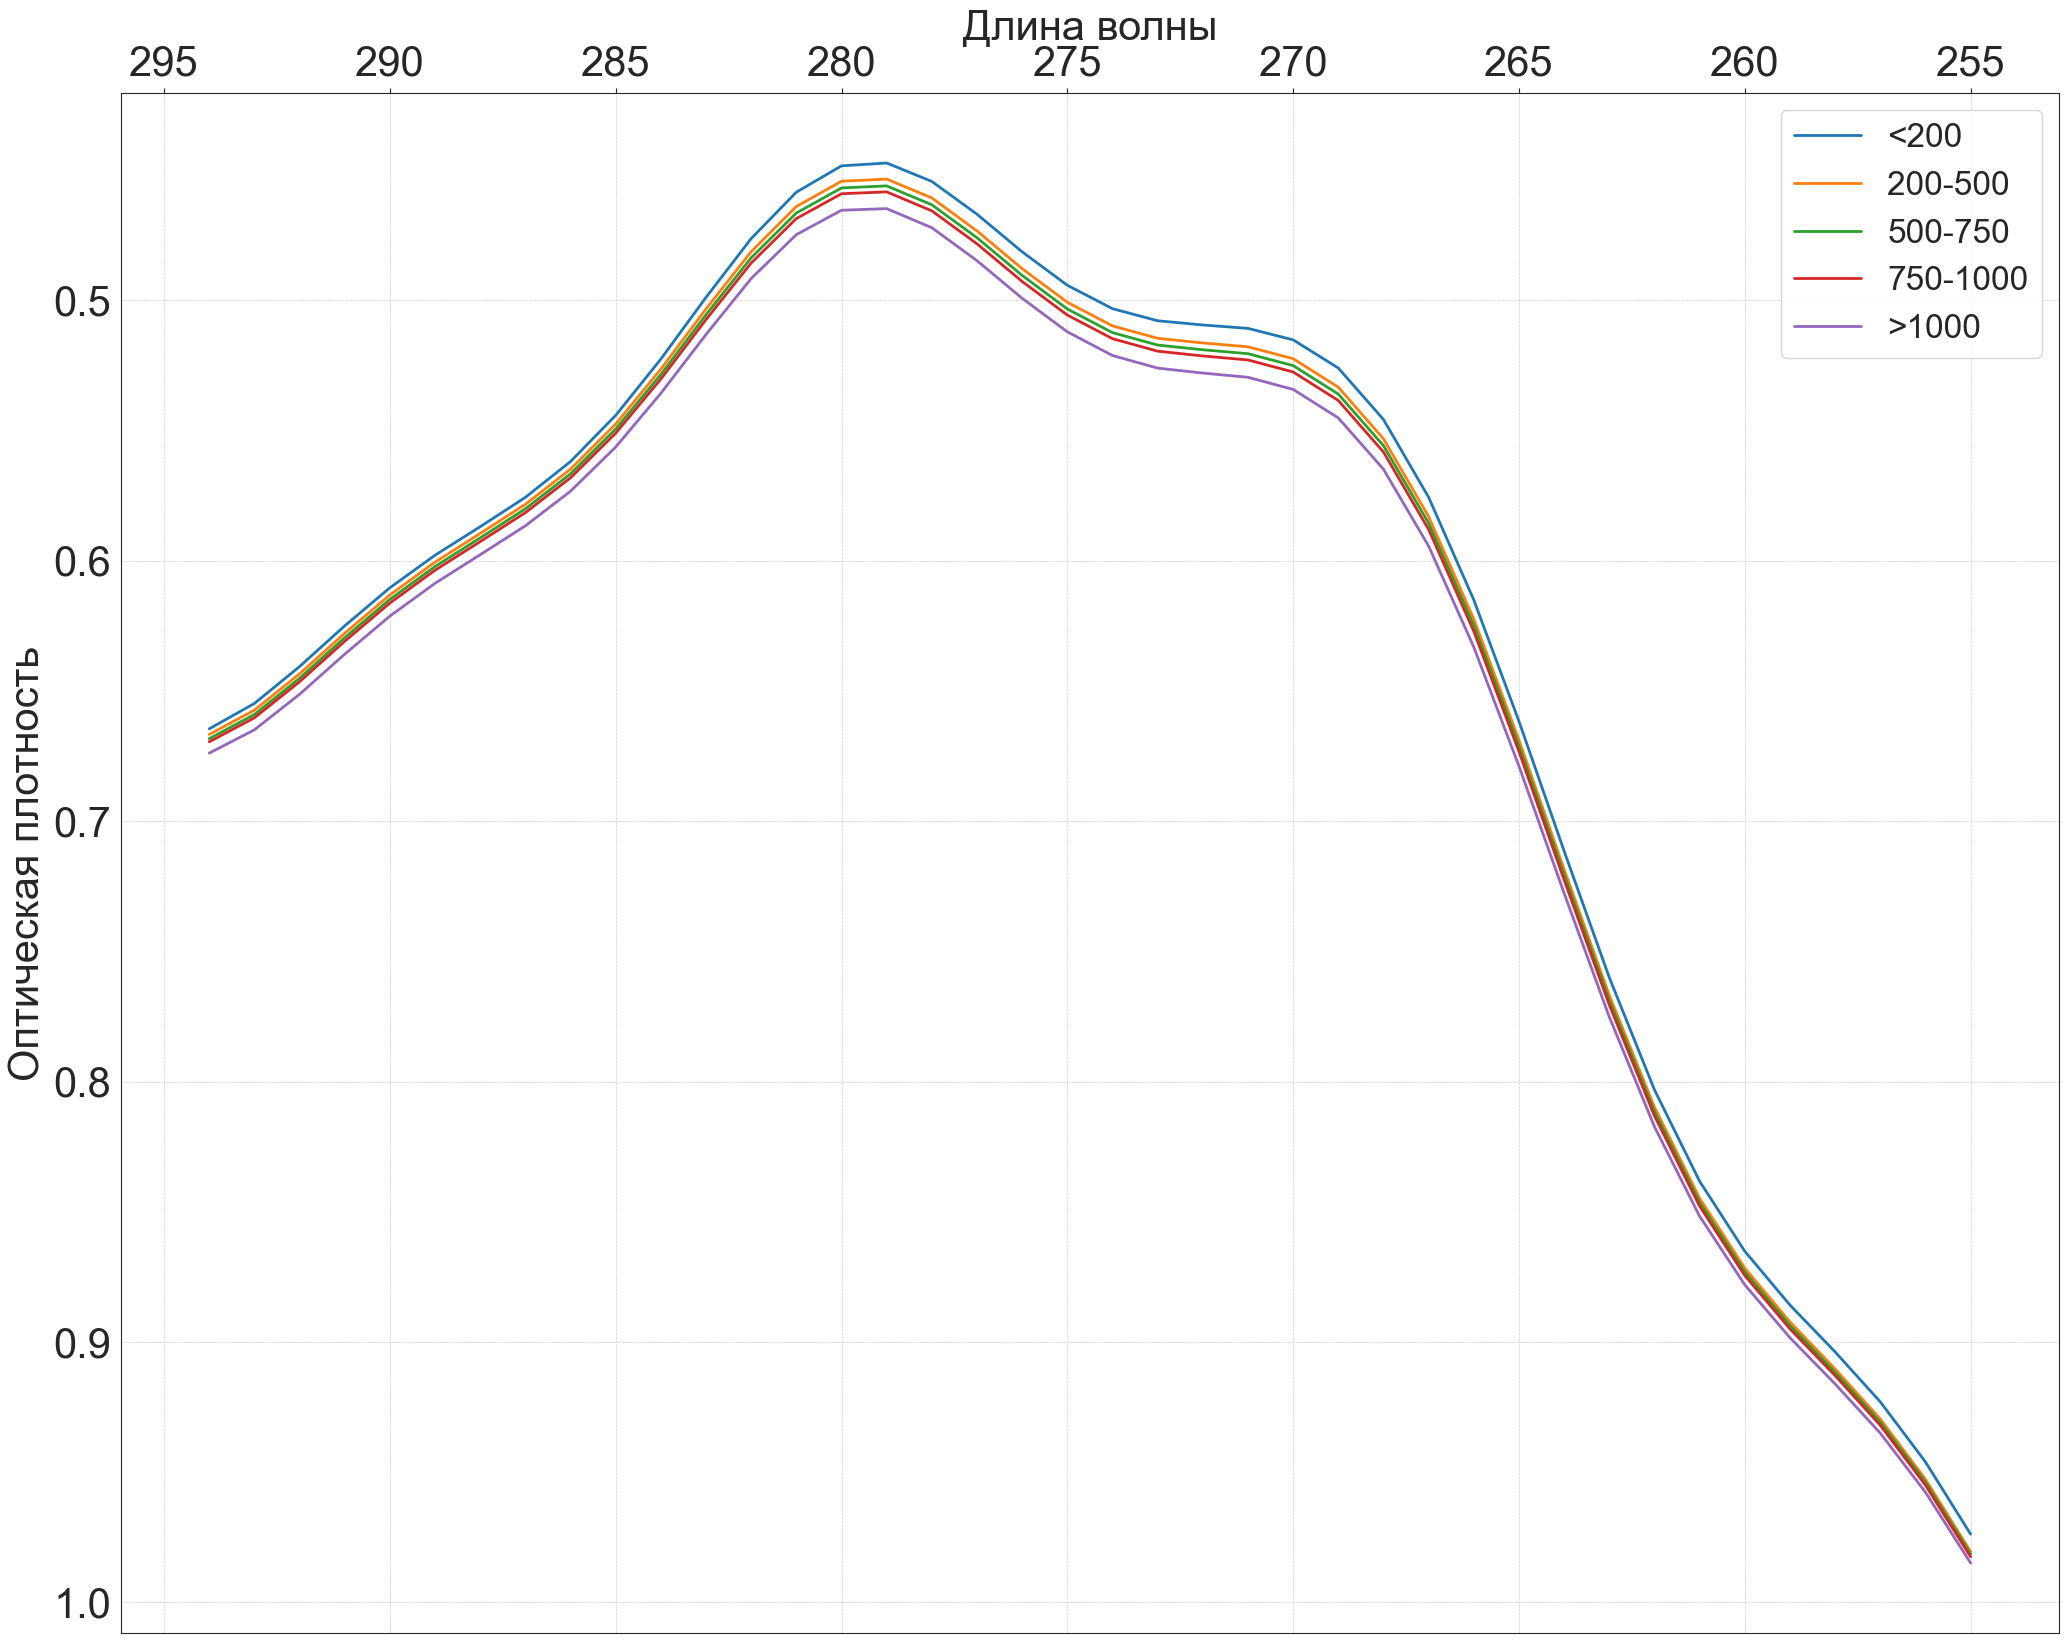

In [149]:
fig, ax = plt.subplots(figsize=(25, 20))


ax.invert_yaxis()
ax.invert_xaxis()

df_somat.iloc[15:55, :].plot(ax=ax, fontsize=15, linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.tick_params(axis='both', which='major', labelsize=30)
ax.legend(['<200','200-500','500-750','750-1000','>1000'],fontsize=24, loc='upper right')

ax.set_xlabel('Длина волны', fontsize=30)
ax.set_ylabel('Оптическая плотность', fontsize=30)

plt.show()

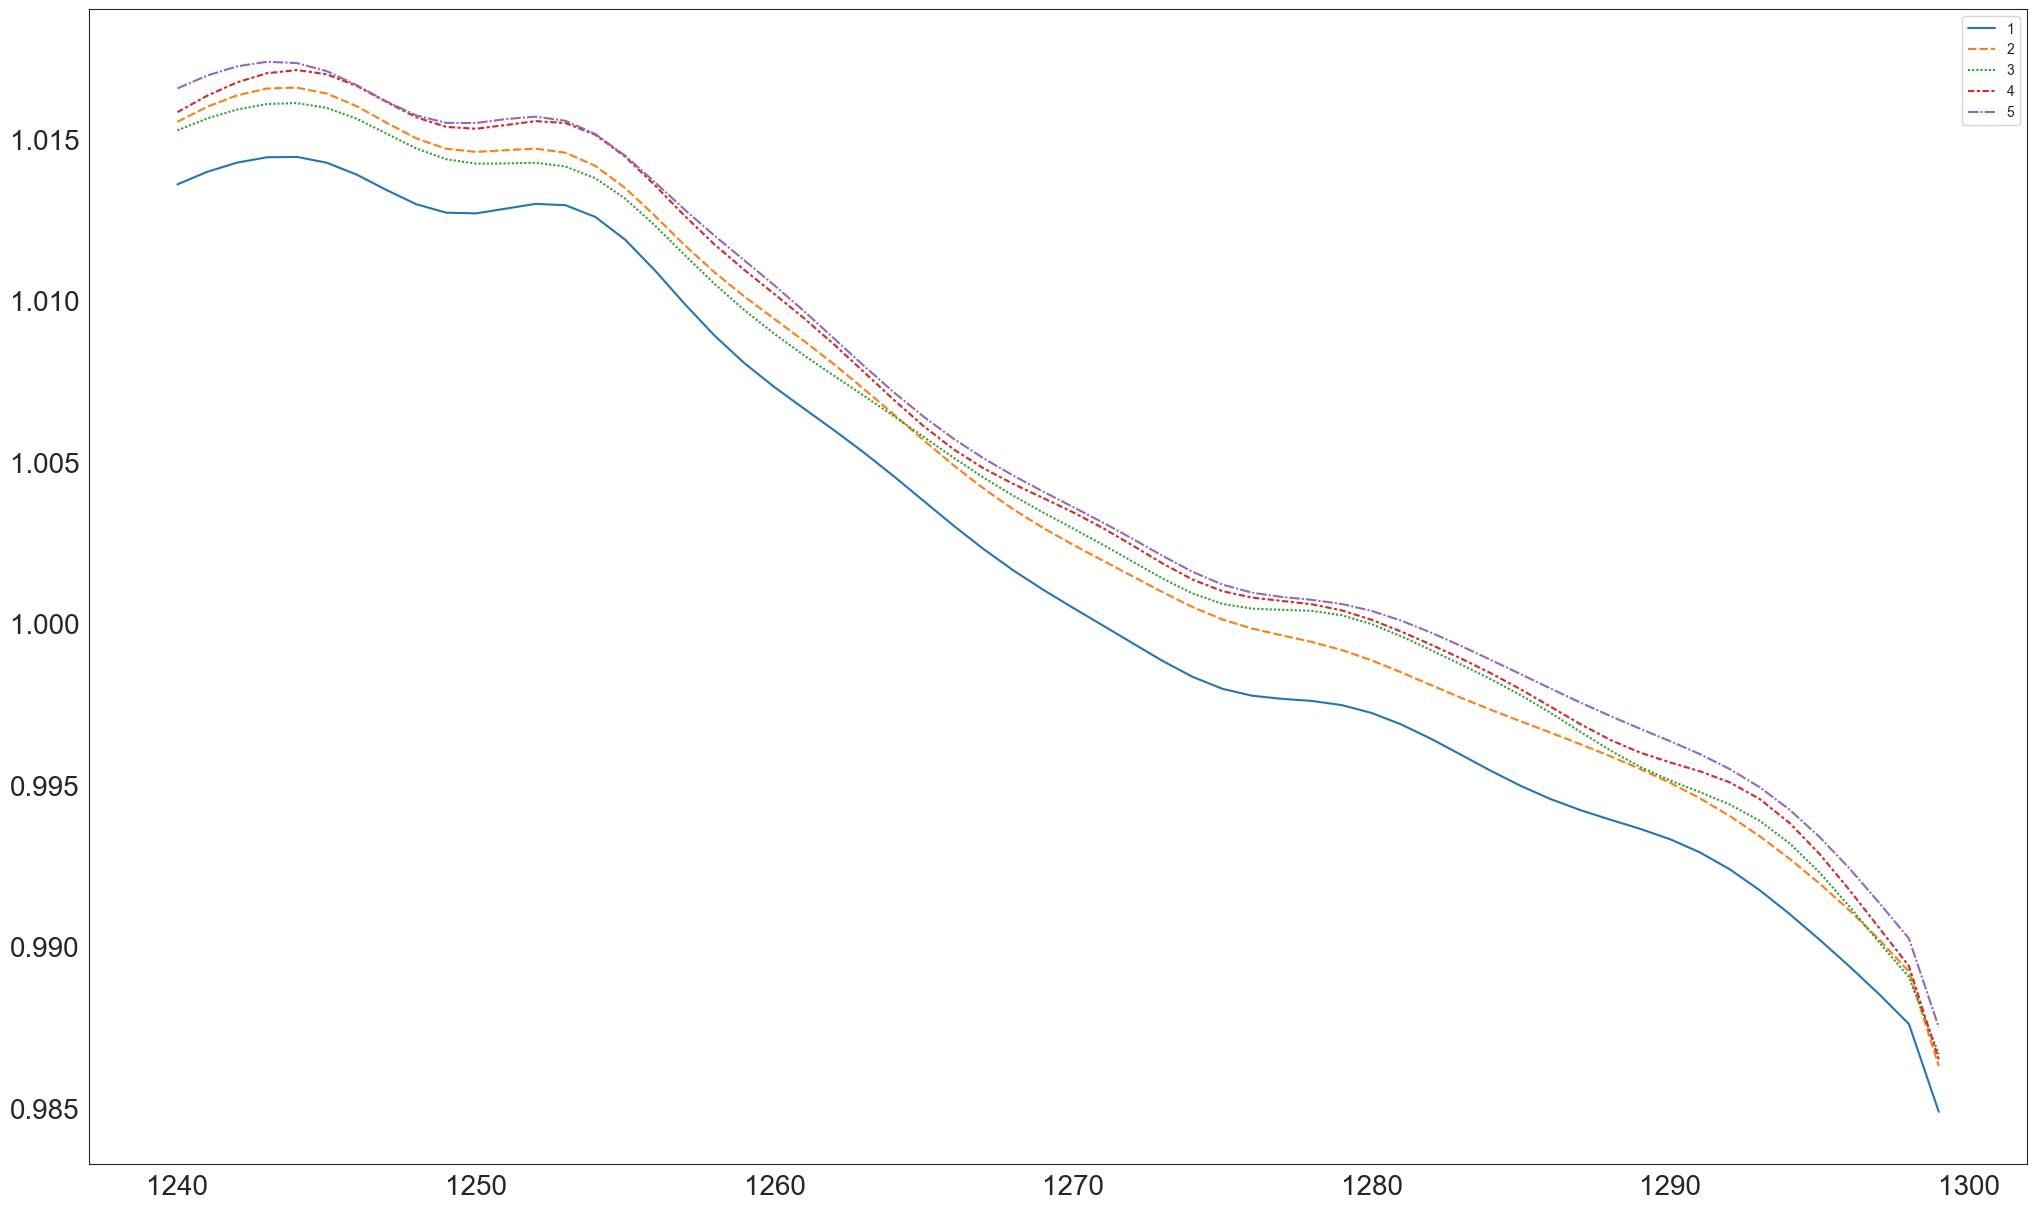

In [44]:
# 5 class
fig = plt.figure(figsize=(25, 15))
ax = sns.lineplot(data=df_somat.iloc[1000:, :])
sns.set_style('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# here set the labelsize by 20
plt.show()

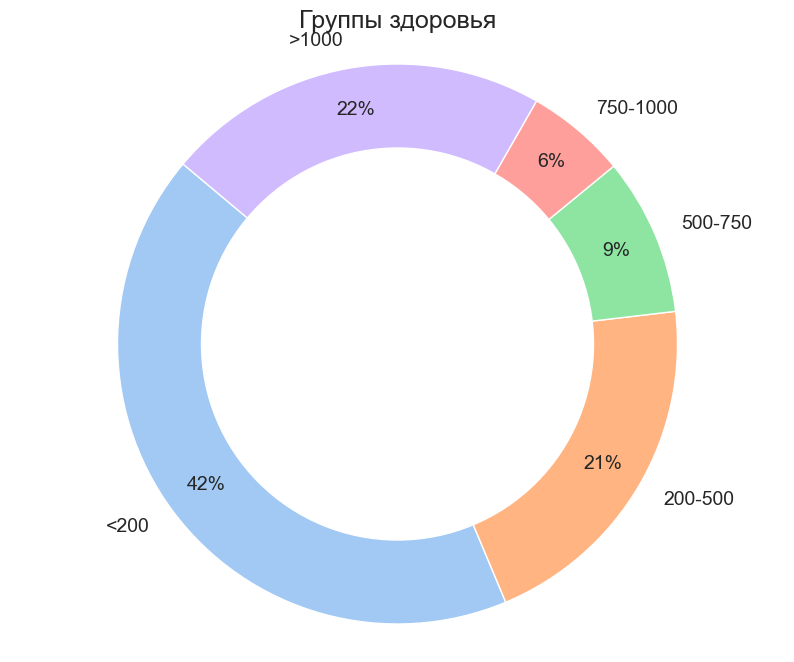

In [140]:
colors = sns.color_palette('pastel')[0:11]

plt.figure(figsize=(10, 8))
plt.pie(df.groupby('group_scc').size(), labels = ['<200', '200-500', '500-750', '750-1000', '>1000'], colors=colors, autopct='%.0f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 14})

plt.title("Группы здоровья", fontsize=18)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.show()

In [64]:
correlation = df.corr()

In [65]:
writer = pd.ExcelWriter('corr_somatic.xlsx')
correlation.to_excel(writer, sheet_name='list 1', index=True)
writer.close()

## Хемометрические методы

df_cells df_scs

In [ ]:
!pip install scikit-learn

In [23]:
spectral_data = df_cells.iloc[:, :1060]

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
import numpy as np

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(spectral_data)

In [ ]:
n_components = np.arange(1, 500)

scores = []
std_devs = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in n_components:
    print(n)
    pls = PLSRegression(n_components=n)
    pipeline = make_pipeline(scaler, pls)
    
    score = cross_val_score(pipeline, spectral_data, df_cells['Cells'], cv=cv, scoring='neg_mean_squared_error')
    
    scores.append(-np.mean(score))
    std_devs.append(np.std(score))

optimal_n_components = n_components[np.argmin(scores)]

print(f"Наилучшее количество компонент: {optimal_n_components}")
print(f"Среднеквадратичная ошибка (MSE) при этом: {min(scores)}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_components, scores, marker='o', linestyle='-', color='b')
plt.fill_between(n_components, np.array(scores) - np.array(std_devs), np.array(scores) + np.array(std_devs), color='b', alpha=0.2)
plt.title("Определение оптимального количества компонент для PLS")
plt.xlabel("Количество компонент")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_components = 353

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pls = PLSRegression(n_components=n_components)

scaler = StandardScaler()

pipeline = make_pipeline(scaler, pls)

y_true = df_cells['SCC']
y_pred = cross_val_predict(pipeline, spectral_data, y_true, cv=cv)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R^2): {r2}")

Среднеквадратичная ошибка (MSE): 951849.1109062643
Средняя абсолютная ошибка (MAE): 643.4689531874758
Коэффициент детерминации (R^2): 0.527222193697308


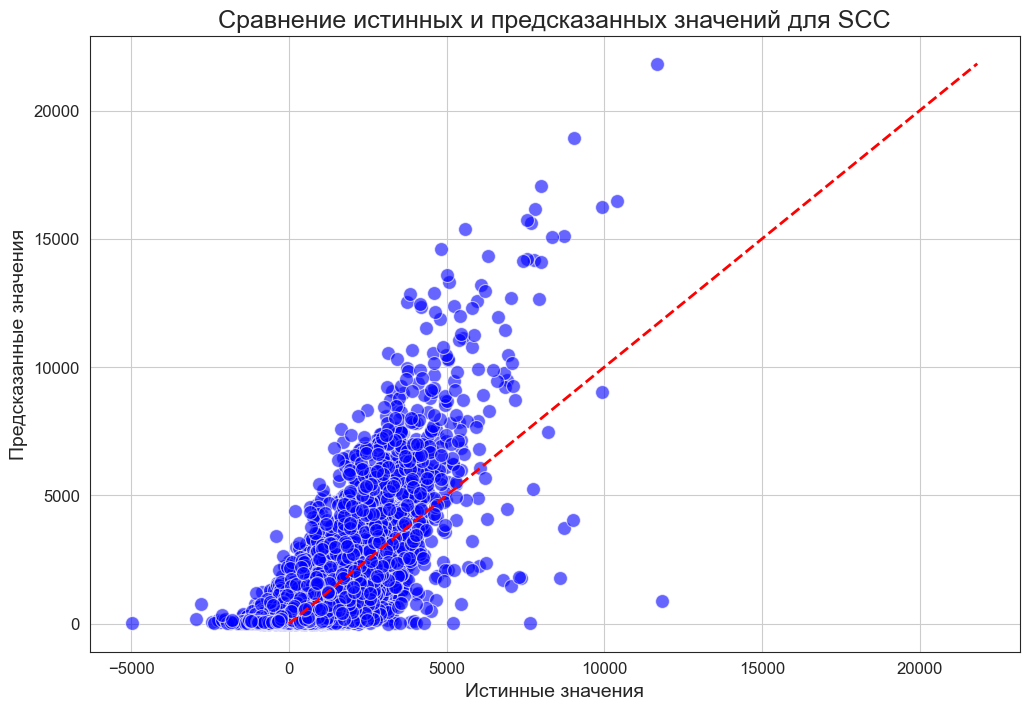

In [83]:
comparison_df = pd.DataFrame({'True Values': df_C[0], 'Predicted Values': df_C['SCC']})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='True Values', y='Predicted Values', data=comparison_df, s=100, color='blue', alpha=0.6)

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)

plt.title('Сравнение истинных и предсказанных значений для SCC', fontsize=18)
plt.xlabel('Истинные значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

In [45]:
%%time
1 + 1

n_components = np.arange(1, 500)

scores = []
std_devs = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in n_components:
    print(n)
    pls = PLSRegression(n_components=n)
    pipeline = make_pipeline(scaler, pls)
    
    score = cross_val_score(pipeline, spectral_data, df_scs['SCS'], cv=cv, scoring='neg_mean_squared_error')
    
    scores.append(-np.mean(score))
    std_devs.append(np.std(score))

optimal_n_components = n_components[np.argmin(scores)]

print(f"Наилучшее количество компонент: {optimal_n_components}")
print(f"Среднеквадратичная ошибка (MSE) при этом: {min(scores)}")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 

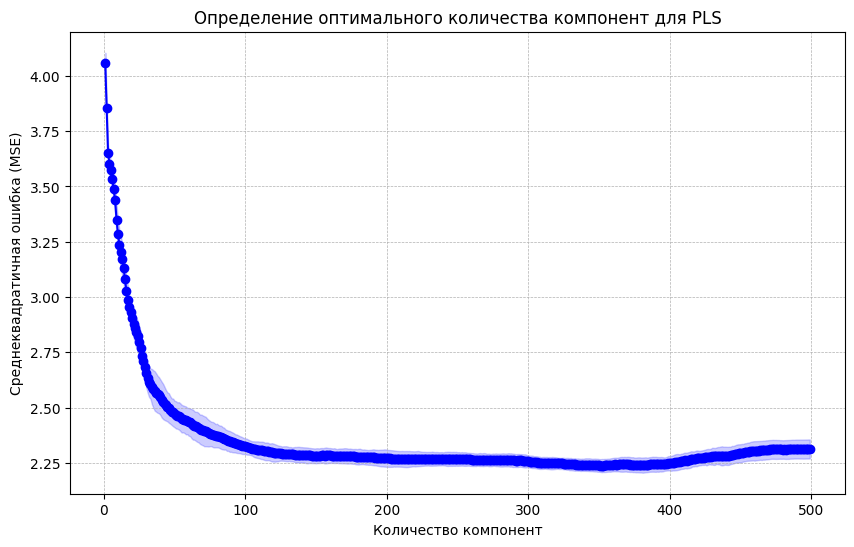

In [147]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_components, scores, marker='o', linestyle='-', color='b')
plt.fill_between(n_components, np.array(scores) - np.array(std_devs), np.array(scores) + np.array(std_devs), color='b', alpha=0.2)
plt.title("Определение оптимального количества компонент для PLS")
plt.xlabel("Количество компонент")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.show()

Наилучшее количество компонент: 351
Среднеквадратичная ошибка (MSE) при этом: 2.23769159733814

In [25]:
n_components = 351

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pls = PLSRegression(n_components=n_components)

scaler = StandardScaler()

pipeline = make_pipeline(scaler, pls)

y_true_1 = df_scs['SCS']
y_pred_1 = cross_val_predict(pipeline, spectral_data, y_true_1, cv=cv)

mse = mean_squared_error(y_true_1, y_pred_1)
r2 = r2_score(y_true_1, y_pred_1)
mae = mean_absolute_error(y_true_1, y_pred_1)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R^2): {r2}")

Среднеквадратичная ошибка (MSE): 2.237693182174487
Средняя абсолютная ошибка (MAE): 1.2047692634265572
Коэффициент детерминации (R^2): 0.5074616863540845


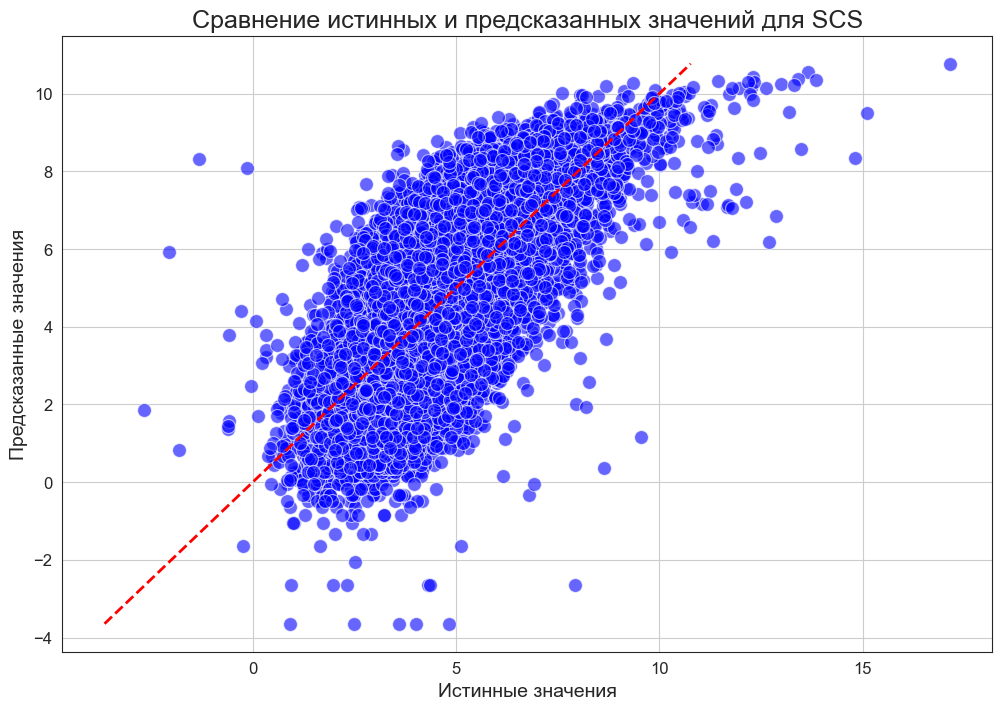

In [86]:
comparison_df = pd.DataFrame({'True Values': df_S[0], 'Predicted Values': df_S['SCS']})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='True Values', y='Predicted Values', data=comparison_df, s=100, color='blue', alpha=0.6)

plt.plot([y_true_1.min(), y_true_1.max()], [y_true_1.min(), y_true_1.max()], 'r--', lw=2)

plt.title('Сравнение истинных и предсказанных значений для SCS', fontsize=18)
plt.xlabel('Истинные значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

In [66]:
df_C=pd.DataFrame(y_pred)

In [70]:
df_C = pd.concat([df_C, y_true], axis=1)

In [71]:
writer = pd.ExcelWriter('pred1.xlsx')
df_C.to_excel(writer, sheet_name='list 1', index=True)
writer.save()

C:\Users\Popgen\AppData\Local\Temp\ipykernel_16108\1901296784.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [26]:
new_spectral_data = pd.read_excel('C:/Users/Popgen/Desktop/Книга1.xlsx')
print(new_spectral_data.shape)
new_spectral_data = new_spectral_data.iloc[:, 6:]

(300, 1066)


In [28]:
new_spectral_data = new_spectral_data.replace(',', '.', regex=True)
new_spectral_data = new_spectral_data.iloc[:,:].astype(float)

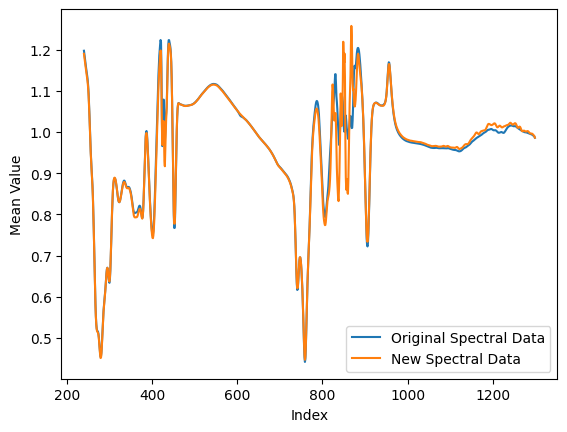

In [192]:
mean_spectral_data = spectral_data.mean().T
mean_new_spectral_data = new_spectral_data.mean().T

plt.plot(mean_spectral_data, label='Original Spectral Data')
plt.plot(mean_new_spectral_data, label='New Spectral Data')

plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.legend()

plt.show()

In [29]:
pipeline.fit(spectral_data, y_true_1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('plsregression', PLSRegression(n_components=351))])

In [222]:
new_data = pd.read_excel('C:/Users/Popgen/Desktop/test_50_yaers.xlsx')

In [212]:
#############################
new_spectral_data = new_data.iloc[:, 43:]
print(new_spectral_data.shape)
new_spectral_data = new_spectral_data.replace(',', '.', regex=True)
new_spectral_data = new_spectral_data.iloc[:,:].astype(float)

(353, 1060)


In [30]:
y_pred_new = pipeline.predict(new_spectral_data)

In [31]:
df_S=pd.DataFrame(y_pred_new)
df_S.head()

0
0  9.116183
1  8.324332
2  4.176969
3  6.976638
4  4.346150

In [32]:
df_S['SCC'] = 100. * np.power(df_S[0] - 3, 2)

In [33]:
writer = pd.ExcelWriter('pred_.xlsx')
df_S.to_excel(writer, sheet_name='list 1', index=True)
writer.save()

C:\Users\Popgen\AppData\Local\Temp\ipykernel_4468\2358755371.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
